# Data Gathering 

Reference
https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e

In [1]:
# !pip install pandas-datareader

In [4]:
# !pip install yfinance
# !pip install matplotlib
# !pip install seaborn

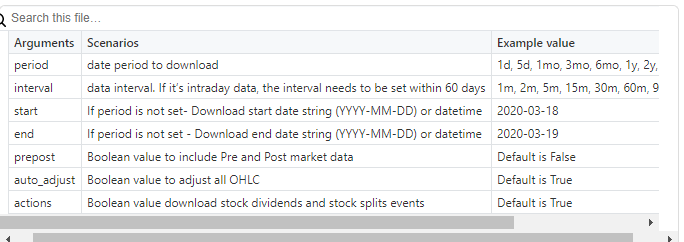

In [3]:
from IPython.display import Image
Image(filename='2021-03-05_17h03_49.png') 

- Thai SETI  www.investing.com
- Vietnam VNI www.investing.com

Asean
- Singapore ^STI
- Malaysia ^KLSE
- Indonesia ^JKSE
- Philippines PSEI.PS

Asia
- Hong Kong ^HSI
- China 399001.SZ
- South Korea ^KS11
- Japan ^N225
- Australia ^AORD
- New Zealand ^NZ50
- Taiwan ^TWII
- BSE SENSEX India ^BSESN
- India ^NSEI

Western
- USA ^DJI
- USA NY ^NYA
- USA AMEX ^XAX
- USA Chicago ^RUT
- USA Toronto ^GSPTSE
- GB ^FTSE
- German  ^GDAXI
- Paris ^FCHI
- Zurich ^STOXX50E
- Brussels ^BFX
- Russia IMOEX.ME
- Sao Paolo(Brazilian) ^BVSP
- Mexico ^MXX
- Santiago(Chile) ^IPSA
- Buenos Aires(Argentina) ^MERV
- Tel Aviv(Israel) ^TA125.TA
- Egyptian ^CASE30
- Johannesburg(South Africa)  ^JN0U.JO

-Other
- Gold GC=F
- Crude Oil CL=F
- Bitcoin USD BTC-USD

## Get stock value one by one

In [2]:
import yfinance as yf
tricker = "^DJI"
stockData = yf.Ticker(tricker)

# get stock info
print(stockData.info)

start ="2010-01-01"
end ="2020-12-31"
# get historical market data
hist = stockData.history(start=start, end=end)
hist.head()

# hist.info()

{'previousClose': 34133, 'regularMarketOpen': 34163.99, 'twoHundredDayAverage': 31063.926, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 34331.2, 'navPrice': None, 'averageDailyVolume10Day': 340731428, 'totalAssets': None, 'regularMarketPreviousClose': 34133, 'fiftyDayAverage': 33503.164, 'trailingAnnualDividendRate': None, 'open': 34163.99, 'toCurrency': None, 'averageVolume10days': 340731428, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 34039.66, 'priceHint': 2, 'currency': 'USD', 'regularMarketVolume': 255811646, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': None, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 198001056, 'priceToSalesTrailing12Months': None, 'dayLow': 34039.66, 'ask': 34319.96, 'ytdReturn': None, 'askSize': 0, 'volume': 25581164

Open          High           Low         Close   Volume  \
Date                                                                          
2009-12-31  10548.509766  10555.009766  10423.129883  10428.049805  1379400   
2010-01-04  10430.690430  10604.969727  10430.690430  10583.959961  1797800   
2010-01-05  10584.559570  10584.559570  10522.519531  10572.019531  1885400   
2010-01-06  10564.719727  10594.990234  10546.549805  10573.679688  1860400   
2010-01-07  10571.110352  10612.370117  10505.209961  10606.860352  2173900   

            Dividends  Stock Splits  
Date                                 
2009-12-31          0             0  
2010-01-04          0             0  
2010-01-05          0             0  
2010-01-06          0             0  
2010-01-07          0             0

In [2]:
# Save data 
data_df = yf.download(tricker, start=start, end=end)
data_df.to_csv(tricker+'.csv')

[*********************100%***********************]  1 of 1 completed


## Get all stock price in Dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3531 entries, 2009-12-24 to 2020-12-31
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SET                              2684 non-null   float64
 1   VNI                              2745 non-null   float64
 2   STI Index                        2744 non-null   float64
 3   FTSE Bursa Malaysia KLCI         2699 non-null   float64
 4   Composite Index                  2683 non-null   float64
 5   PSEi INDEX                       2676 non-null   float64
 6   HANG SENG INDEX                  2707 non-null   float64
 7   Shenzhen Component               2674 non-null   float64
 8   KOSPI Composite Index            2710 non-null   float64
 9   Nikkei 225                       2696 non-null   float64
 10  ALL ORDINARIES                   2780 non-null   float64
 11  S&P/NZX 50 INDEX GROSS ( GROSS   2686 non-null   float64
 12  TS

<AxesSubplot:xlabel='Date'>

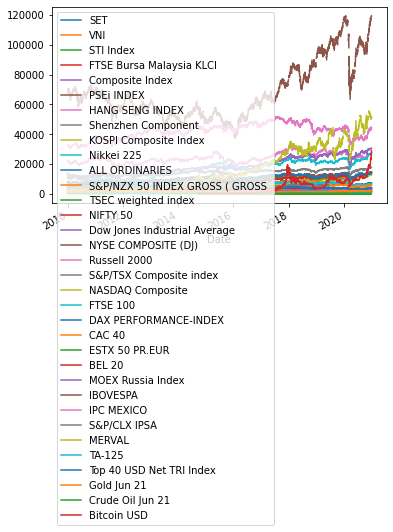

In [5]:
import yfinance as yf
import pandas as pd

df_trickers = pd.read_csv("StockIndexTrickers.csv")
# print(df_trickers.head())
# df_trickers.info()

start ="2009-12-25"
# start ="2010-01-01"
end ="2020-12-31"

stockDataList = []

trickers = df_trickers[df_trickers["FromYahoo"]==1][["Trickers","Stock Index"]]
# trickers
                                  
for index, row in trickers.iterrows():
    stockData = yf.Ticker(row["Trickers"])
    histData = stockData.history(start=start, end=end)
    dataFrame = pd.DataFrame(histData["Close"])
    dataFrame.columns =[stockData.info['shortName']]
    stockDataList.append(dataFrame)
    
stockThai = pd.read_csv("SET Index Historical Data.csv")
stockThai['Date'] = pd.to_datetime(stockThai['Date'])
stockThai = stockThai.set_index('Date')
df_stockThai = pd.DataFrame(stockThai['Close'].str.replace(',','').astype(float))
df_stockThai.columns =['SET']

stockVietnam = pd.read_csv("VN Historical Data.csv")
stockVietnam['Date'] = pd.to_datetime(stockVietnam['Date'])
stockVietnam = stockVietnam.set_index('Date')
df_stockVietnam = pd.DataFrame(stockVietnam['Close'].str.replace(',','').astype(float))
df_stockVietnam.columns =["VNI"]

df_allStocks = pd.merge(df_stockThai, df_stockVietnam, how= "outer",left_index=True, right_index=True)

for i in range(len(stockDataList)):
    df_allStocks = pd.merge(df_allStocks, stockDataList[i], how= "outer",left_index=True, right_index=True)
    
df_allStocks.info()
df_allStocks.plot()

## Handle null value

In [6]:
# print(df_allStocks.isnull().sum())

In [6]:
df_allStocks = df_allStocks.ffill()

In [4]:
# df_allStocks.isnull().sum()

In [7]:
start2 ="2010-01-01"
end2 ="2020-12-31"
df_allStocks = df_allStocks.loc[start2:end2]

df_allStocks.head()

SET     VNI    STI Index  FTSE Bursa Malaysia KLCI  \
Date                                                                
2010-01-04  732.28  517.05  2894.550049               1275.750000   
2010-01-05  732.11  532.53  2920.280029               1288.239990   
2010-01-06  735.73  534.46  2930.489990               1293.170044   
2010-01-07  734.63  533.34  2913.250000               1291.420044   
2010-01-08  738.96  520.90  2922.760010               1292.979980   

            Composite Index   PSEi INDEX  HANG SENG INDEX  Shenzhen Component  \
Date                                                                            
2010-01-04      2575.312988  3004.237549     21823.279297        13533.387695   
2010-01-05      2605.175537  3027.681396     22279.580078        13517.228516   
2010-01-06      2603.195557  3039.148438     22416.669922        13505.028320   
2010-01-07      2586.794189  3076.988770     22269.449219        13235.332031   
2010-01-08      2614.268311  3076.388916     22296.750000        13267.291992   

            KOSPI Composite Index    Nikkei 225  ...  MOEX Russia Index  \
Date                                             ...                      
2010-01-04            1696.140015  10654.790039  ...                NaN   
2010-01-05            1690.619995  10681.830078  ...                NaN   
2010-01-06            1705.319946  10731.450195  ...                NaN   
2010-01-07            1683.449951  10681.660156  ...                NaN   
2010-01-08            1695.260010  10798.320312  ...                NaN   

            IBOVESPA    IPC MEXICO  S&P/CLX IPSA       MERVAL       TA-125  \
Date                                                                         
2010-01-04   70045.0  32758.529297   3620.699951  2384.489990  1089.339966   
2010-01-05   70240.0  32732.759766   3624.100098  2401.750000  1098.199951   
2010-01-06   70729.0  32830.160156   3639.959961  2362.459961  1098.310059   
2010-01-07   70451.0  33064.570312   3681.060059  2389.449951  1094.040039   
2010-01-08   70263.0  32892.039062   3726.500000  2352.760010  1094.040039   

            Top 40 USD Net TRI Index  Gold Jun 21  Crude Oil Jun 21  \
Date                                                                  
2010-01-04                       NaN  1117.699951         81.510002   
2010-01-05                       NaN  1118.099976         81.769997   
2010-01-06                       NaN  1135.900024         83.180000   
2010-01-07                       NaN  1133.099976         82.660004   
2010-01-08                       NaN  1138.199951         82.750000   

            Bitcoin USD  
Date                     
2010-01-04          NaN  
2010-01-05          NaN  
2010-01-06          NaN  
2010-01-07          NaN  
2010-01-08          NaN  

[5 rows x 34 columns]

## Save raw data to csv

In [8]:
# Save data 
df_allStocks.to_csv('StocksData.csv')

# Building Model

## Get data from CSV

In [9]:
#Get data from CSV
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv('StocksData.csv')
#Convert column date to index
dti = pd.to_datetime(df['Date'])
df.index = dti
df.drop(['Date'],axis = 1,inplace = True)
df_stock = df.iloc[:,0:29]
df_stock.drop(columns = ['MOEX Russia Index'],inplace = True)
df_stock_asia = df.iloc[:,0:14]
df_stock_asean = df.iloc[:,0:7]
df_stock_europe = df.loc[:,['SET','FTSE 100','DAX PERFORMANCE-INDEX','CAC 40','ESTX 50 PR.EUR','BEL 20','MOEX Russia Index','TA-125']]
df_stock_NA = df.loc[:,['SET','Dow Jones Industrial Average','NYSE COMPOSITE (DJ)','Russell 2000','S&P/TSX Composite index','NASDAQ Composite','IPC MEXICO']]
df_commodity = df.loc[:,['SET','Gold Jun 21','Crude Oil May 21','Bitcoin USD']]

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Crude Oil May 21'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [10]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
df_stock.describe()

SET          VNI    STI Index  FTSE Bursa Malaysia KLCI  \
count  3525.000000  3525.000000  3525.000000               3525.000000   
mean   1412.059186   685.602247  3082.032875               1654.265137   
std     255.605990   213.776846   257.393960                140.636756   
min     685.890000   336.730000  2233.479980               1219.719971   
25%    1282.680000   505.120000  2880.760010               1575.010010   
50%    1479.070000   611.550000  3136.260010               1665.709961   
75%    1590.130000   908.180000  3267.479980               1766.829956   
max    1838.960000  1204.330000  3615.280029               1895.180054   

       Composite Index   PSEi INDEX  HANG SENG INDEX  Shenzhen Component  \
count      3525.000000  3525.000000      3525.000000         3525.000000   
mean       5002.882500  6614.645471     24198.567828        10382.395802   
std         963.989215  1439.266634      3154.574919         1811.059396   
min        2475.475586  2796.890869     16250.269531         6998.111816   
25%        4357.973633  5841.377930     21926.880859         9167.650391   
50%        5068.430664  7101.723633     23678.410156        10313.454102   
75%        5832.311035  7750.117188     26521.849609        11324.632812   
max        6689.287109  9056.291016     33154.121094        18098.068359   

       KOSPI Composite Index    Nikkei 225  ALL ORDINARIES  \
count            3525.000000   3525.000000     3525.000000   
mean             2071.614778  17145.704310     5511.229104   
std               210.597514   5000.478310      728.352758   
min              1457.640015   8160.009766     3927.600098   
25%              1947.670044  13485.139648     4981.899902   
50%              2028.989990  18264.789062     5498.500000   
75%              2170.250000  21382.619141     6030.299805   
max              2873.469971  27568.150391     7255.200195   

       S&P/NZX 50 INDEX GROSS ( GROSS   TSEC weighted index      NIFTY 50  \
count                      3525.000000          3525.000000   3525.000000   
mean                       6782.383392          9438.908977   8390.339593   
std                        2744.411453          1497.979691   2327.060126   
min                        2933.820068          6633.299316   4544.200195   
25%                        4473.379883          8280.219727   5987.700195   
50%                        6418.129883          9206.528320   8342.150391   
75%                        8806.040039         10558.290039  10526.750000   
max                       13246.769531         14687.700195  13981.950195   

       Dow Jones Industrial Average  NYSE COMPOSITE (DJ)  Russell 2000  \
count                   3525.000000          3525.000000   3525.000000   
mean                   19180.741413         10648.968089   1212.792838   
std                     5595.237493          1969.718679    318.965648   
min                     9686.480469          6434.810059    586.489990   
25%                    14897.549805          9187.790039    968.159973   
50%                    17946.679688         10835.900391   1210.140015   
75%                    24713.980469         12402.740234   1500.699951   
max                    30409.560547         14516.730469   2007.099976   

       S&P/TSX Composite index  NASDAQ Composite     FTSE 100  \
count              3525.000000       3525.000000  3525.000000   
mean              14430.181933       5538.496569  6563.681216   
std                1631.540464       2424.766373   703.135040   
min               11092.500000       2091.790039  4805.799805   
25%               12925.099609       3409.169922  5963.600098   
50%               14673.500000       5032.750000  6627.200195   
75%               15668.900391       7354.339844  7198.700195   
max               17944.099609      12899.419922  7877.500000   

       DAX PERFORMANCE-INDEX       CAC 40  ESTX 50 PR.EUR       BEL 20  \
count            3525.000000  3525.000000     3525.000000  3525.000000   
mean     

## Correlation Table

In [11]:
#Correlation Table
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
df_stock.corr()

SET       VNI  STI Index  \
SET                              1.000000  0.678796   0.579589   
VNI                              0.678796  1.000000   0.223251   
STI Index                        0.579589  0.223251   1.000000   
FTSE Bursa Malaysia KLCI         0.765398  0.224973   0.656062   
Composite Index                  0.930763  0.833706   0.454890   
PSEi INDEX                       0.949605  0.648957   0.480873   
HANG SENG INDEX                  0.726527  0.833698   0.617234   
Shenzhen Component              -0.250413  0.004059  -0.146534   
KOSPI Composite Index            0.638743  0.713958   0.368558   
Nikkei 225                       0.745891  0.883332   0.197921   
ALL ORDINARIES                   0.721104  0.889763   0.308117   
S&P/NZX 50 INDEX GROSS ( GROSS   0.590416  0.896249  -0.047354   
TSEC weighted index              0.540782  0.867493   0.115254   
NIFTY 50                         0.713253  0.934390   0.184893   
Dow Jones Industrial Average     0.713417  0.941056   0.133971   
NYSE COMPOSITE (DJ)              0.817057  0.900827   0.293905   
Russell 2000                     0.805186  0.912509   0.265511   
S&P/TSX Composite index          0.729641  0.855117   0.321612   
NASDAQ Composite                 0.556123  0.877600  -0.056897   
FTSE 100                         0.892773  0.701510   0.656492   
DAX PERFORMANCE-INDEX            0.800119  0.847282   0.275406   
CAC 40                           0.740441  0.867911   0.379804   
ESTX 50 PR.EUR                   0.682687  0.711546   0.474652   
BEL 20                           0.778283  0.767725   0.379616   
IBOVESPA                         0.282710  0.783535   0.025887   
IPC MEXICO                       0.851612  0.471627   0.512257   
S&P/CLX IPSA                     0.425375  0.769528   0.237185   
MERVAL                           0.547686  0.916633  -0.027157   

                                 FTSE Bursa Malaysia KLCI  Composite Index  \
SET                                              0.765398         0.930763   
VNI                                              0.224973         0.833706   
STI Index                                        0.656062         0.454890   
FTSE Bursa Malaysia KLCI                         1.000000         0.586250   
Composite Index                                  0.586250         1.000000   
PSEi INDEX                                       0.725268         0.914346   
HANG SENG INDEX                                  0.423393         0.801098   
Shenzhen Component                              -0.314384        -0.156089   
KOSPI Composite Index                            0.468035         0.710760   
Nikkei 225                                       0.371315         0.842663   
ALL ORDINARIES                                   0.325498         0.847835   
S&P/NZX 50 INDEX GROSS ( GROSS                   0.103580         0.775770   
TSEC weighted index                              0.170389         0.722529   
NIFTY 50                                         0.268056         0.872027   
Dow Jones Industrial Average                     0.261689         0.867009   
NYSE COMPOSITE (DJ)                              0.457218         0.913948   
Russell 2000                                     0.439266         0.905004   
S&P/TSX Composite index                          0.378815         0.850075   
NASDAQ Composite                                 0.123902         0.735472   
FTSE 100                                         0.674271         0.877640   
DAX PERFORMANCE-INDEX                            0.465143         0.879475   
CAC 40                                           0.384699         0.840650   
ESTX 50 PR.EUR                                   0.464351         0.732157   
BEL 20                                           0.499997         0.824814   
IBOVESPA                                        -0.202773         0.533796   
IPC MEXICO                                       0.756679         0.753600   
S&P/CLX IPSA     

## Time Series Analysis 

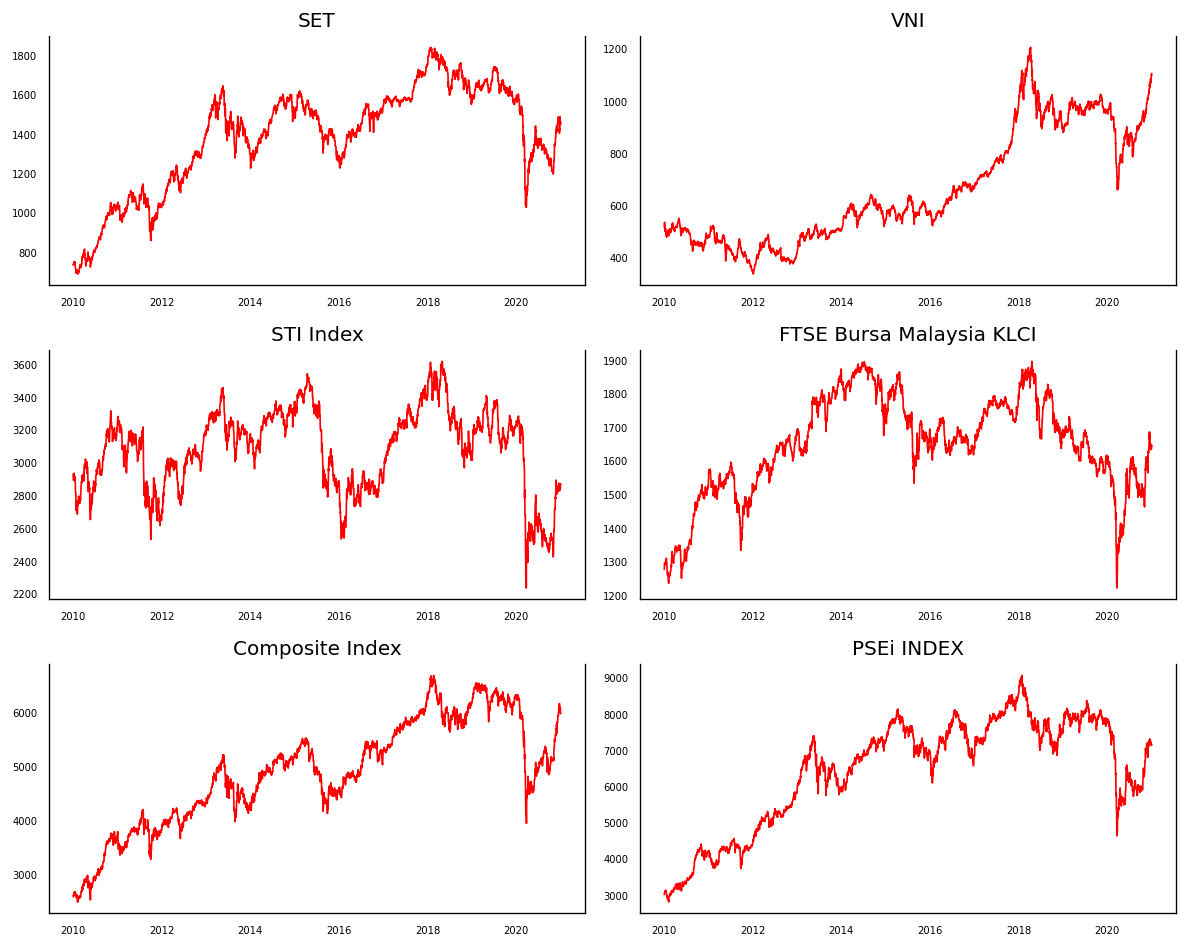

In [12]:
#Time Series Analysis
# Plot
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
 data = df_stock[df_stock.columns[i]]
 ax.plot(data, color='red', linewidth=1)
 ax.set_title(df_stock.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines['top'].set_alpha(0)
 ax.tick_params(labelsize=6)
plt.tight_layout();

## Normal Test 

In [13]:
#Normal Test
from scipy import stats 
for i in df_stock:
    print(df_stock[i])
    stat,p = stats.normaltest(df_stock[i])
    print("Statistics = %.3f, p=%.3f" % (stat,p))
    alpha = 0.05
    if p> alpha:
        print('Data looks Gaussian (fail to reject null hypothesis)')
    else:
        print('Data looks non-Gaussian (reject null hypothesis)')
    

Date
2010-01-04     732.28
2010-01-05     732.11
2010-01-06     735.73
2010-01-07     734.63
2010-01-08     738.96
               ...   
2020-12-27    1486.31
2020-12-28    1452.67
2020-12-29    1461.95
2020-12-30    1449.35
2020-12-31    1449.35
Name: SET, Length: 3525, dtype: float64
Statistics = 327.845, p=0.000
Data looks non-Gaussian (reject null hypothesis)
Date
2010-01-04     517.05
2010-01-05     532.53
2010-01-06     534.46
2010-01-07     533.34
2010-01-08     520.90
               ...   
2020-12-27    1084.42
2020-12-28    1091.33
2020-12-29    1099.49
2020-12-30    1097.54
2020-12-31    1103.87
Name: VNI, Length: 3525, dtype: float64
Statistics = 1971.708, p=0.000
Data looks non-Gaussian (reject null hypothesis)
Date
2010-01-04    2894.550049
2010-01-05    2920.280029
2010-01-06    2930.489990
2010-01-07    2913.250000
2010-01-08    2922.760010
                 ...     
2020-12-27    2833.399902
2020-12-28    2840.139893
2020-12-29    2848.139893
2020-12-30    2869.219971
20

## Auto-correlation (ACF)

In [16]:
# !pip install statsmodels

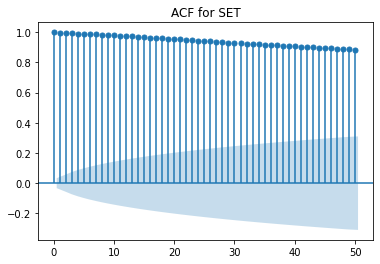

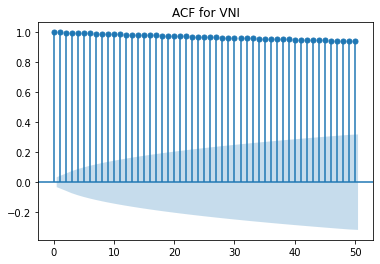

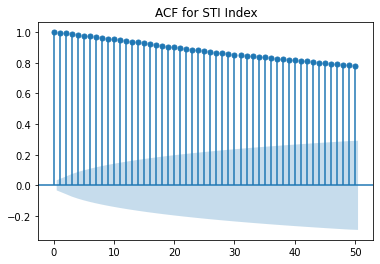

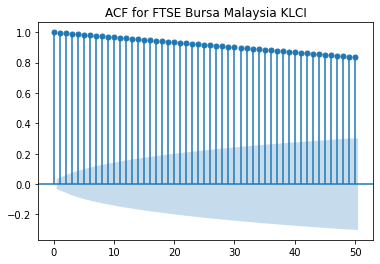

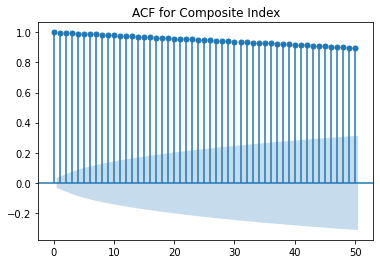

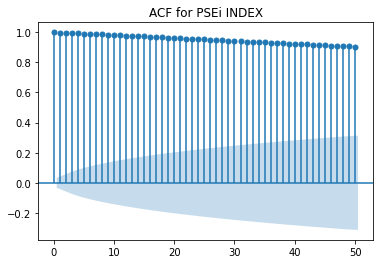

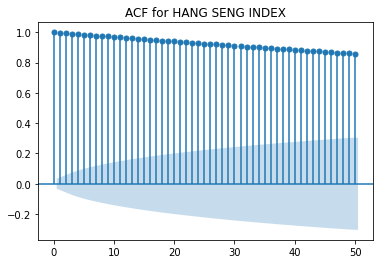

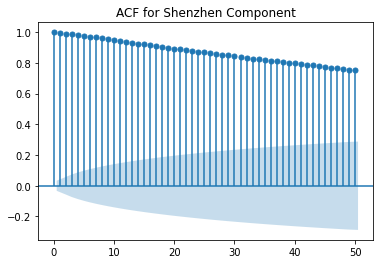

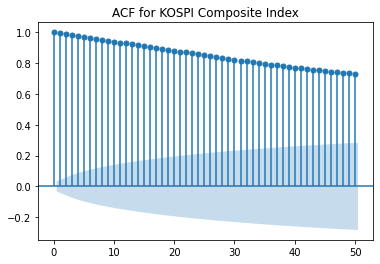

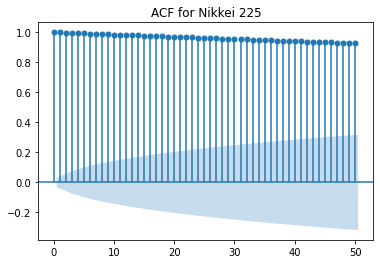

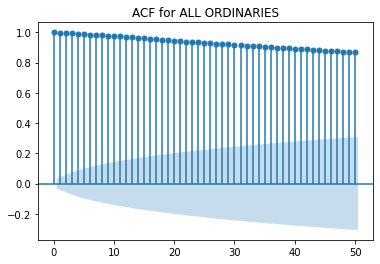

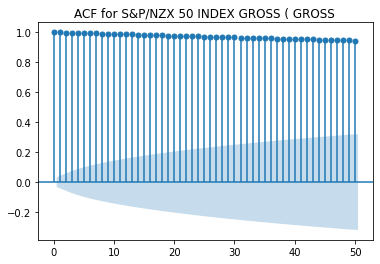

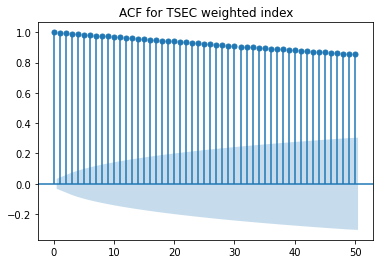

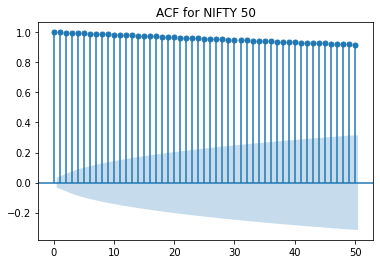

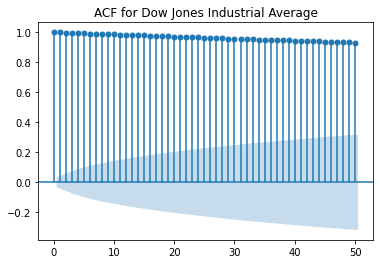

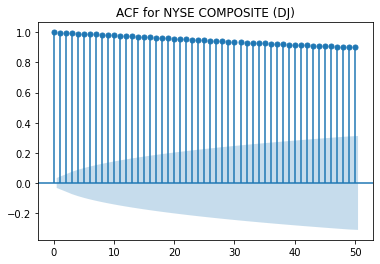

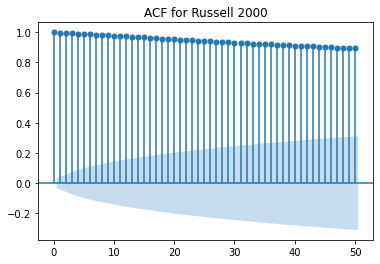

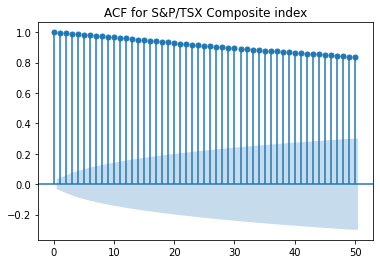

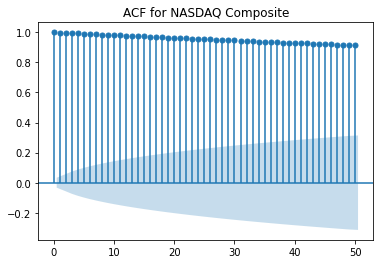

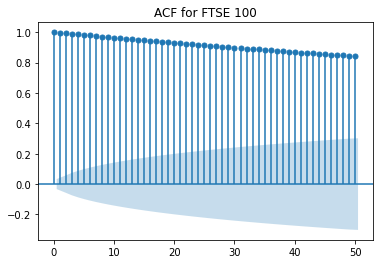

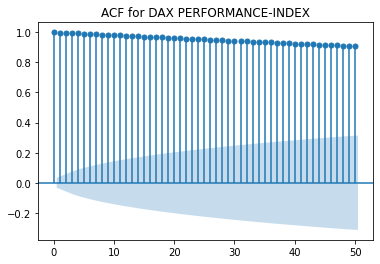

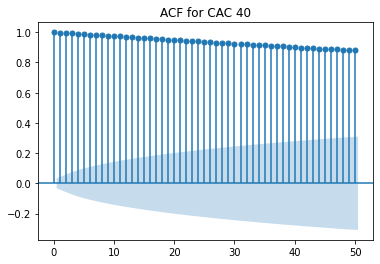

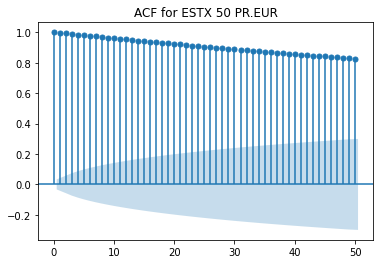

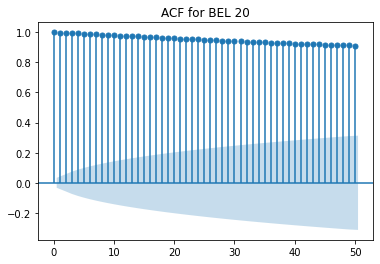

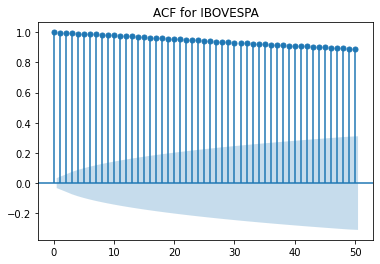

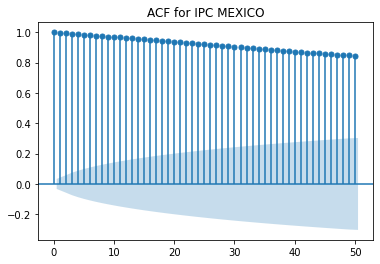

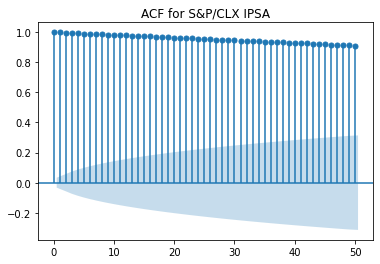

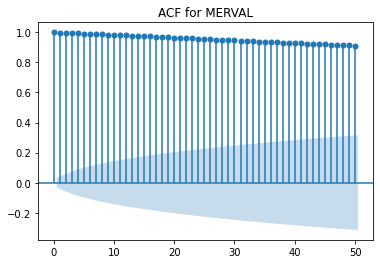

In [17]:
#Auto-correlation (ACF)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
for i in df_stock:
 sm.graphics.tsa.plot_acf(df_stock[i],lags = 50)
 plt.title('ACF for %s' %i)
 plt.show()

## Partial Auto-correlation (PACF)

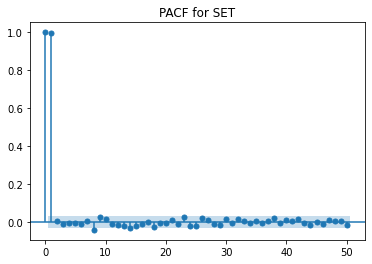

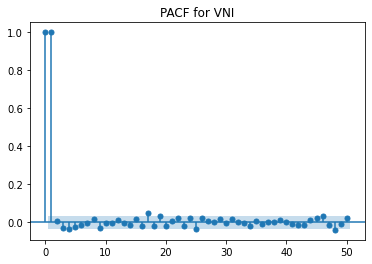

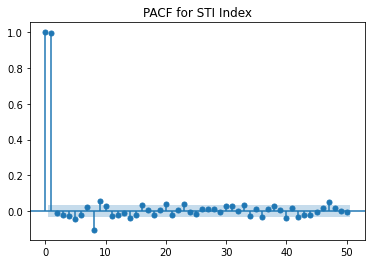

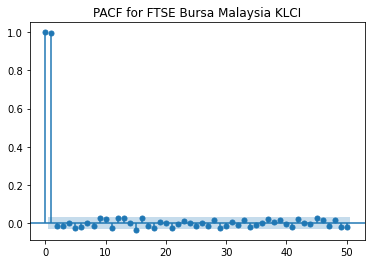

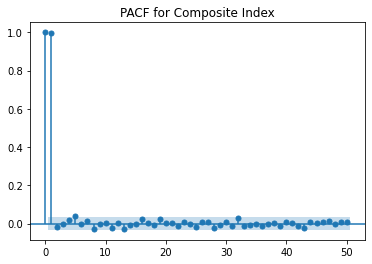

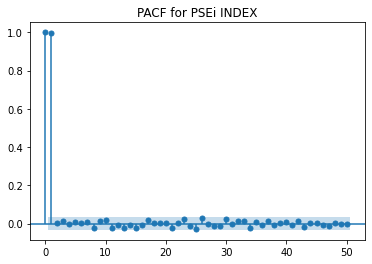

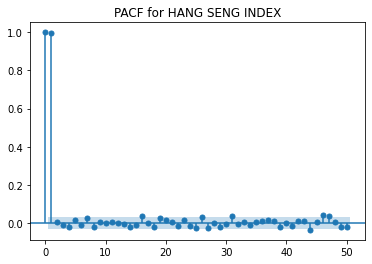

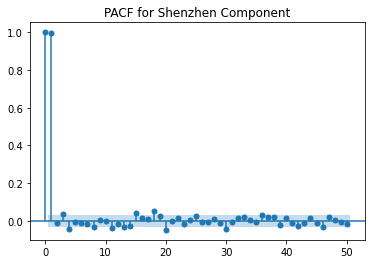

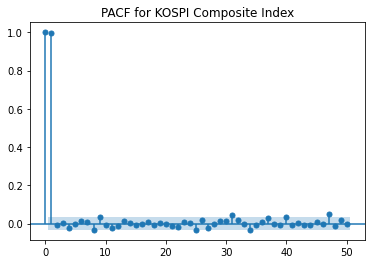

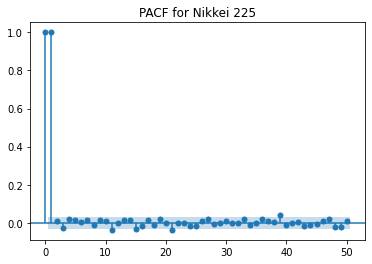

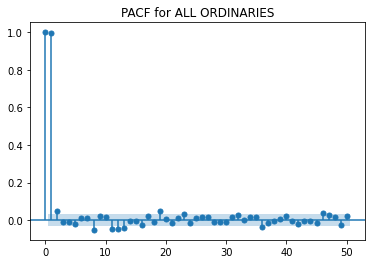

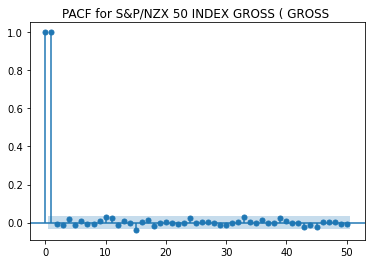

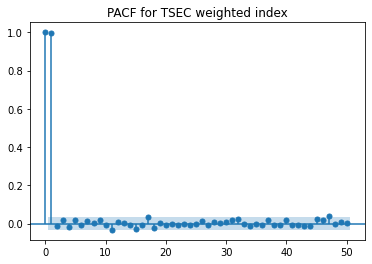

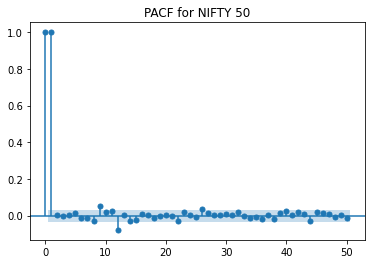

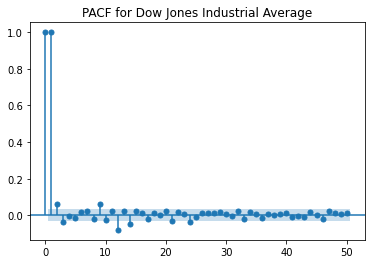

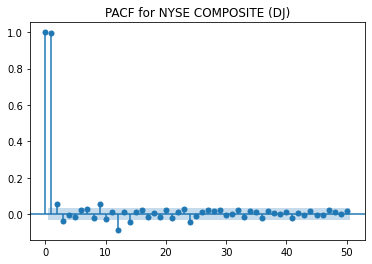

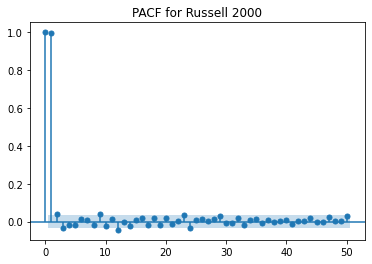

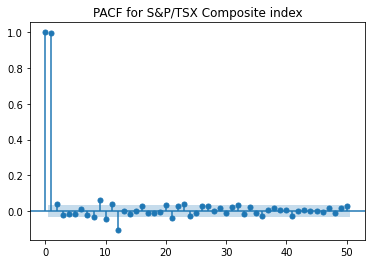

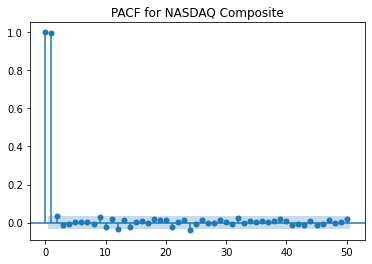

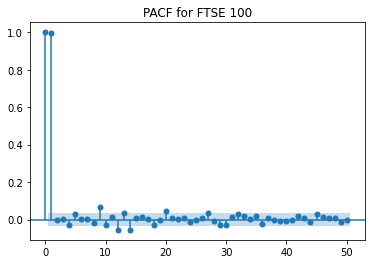

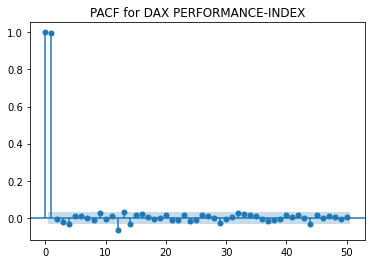

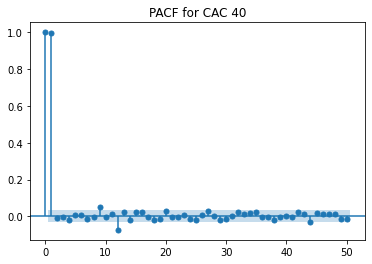

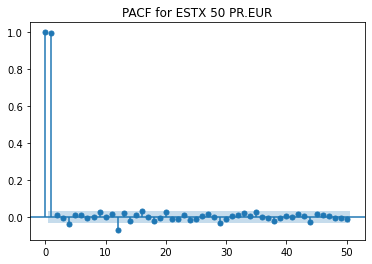

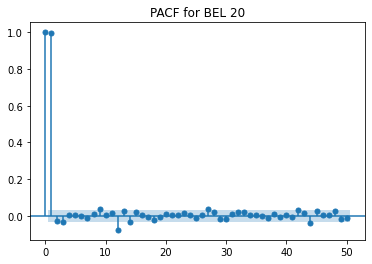

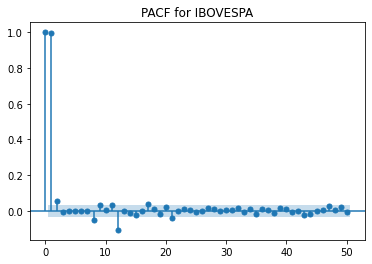

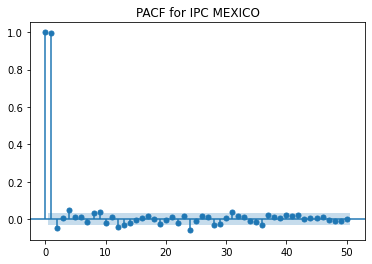

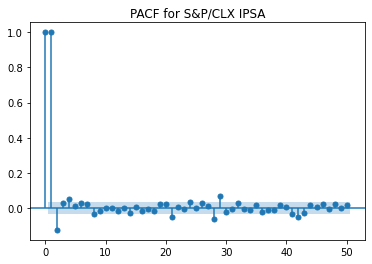

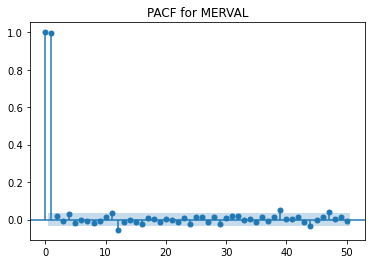

In [18]:
#Partial Auto-correlation (PACF)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
for i in df_stock:
 sm.graphics.tsa.plot_pacf(df_stock[i],lags = 50)
 plt.title('PACF for %s' %i)
 plt.show()

## Stationary Check - Augmentated Dickey Fuller Test

In [19]:
#Stationary Check
#Augmentated Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [20]:
#Split Training Data(70%)/Validation Data(30%)
n_obs = 2467 #For traning data 
X_train = df_stock[0:n_obs]
X_validation = df_stock[n_obs:]
print(X_train.shape,X_validation.shape)

(2467, 28) (1058, 28)


In [21]:
for i in df_stock:
    print(df_stock[i])
    augmented_dickey_fuller_statistics(df_stock[i])

Date
2010-01-04     732.28
2010-01-05     732.11
2010-01-06     735.73
2010-01-07     734.63
2010-01-08     738.96
               ...   
2020-12-27    1486.31
2020-12-28    1452.67
2020-12-29    1461.95
2020-12-30    1449.35
2020-12-31    1449.35
Name: SET, Length: 3525, dtype: float64
ADF Statistic: -2.636441
p-value: 0.085697
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Date
2010-01-04     517.05
2010-01-05     532.53
2010-01-06     534.46
2010-01-07     533.34
2010-01-08     520.90
               ...   
2020-12-27    1084.42
2020-12-28    1091.33
2020-12-29    1099.49
2020-12-30    1097.54
2020-12-31    1103.87
Name: VNI, Length: 3525, dtype: float64
ADF Statistic: -0.400646
p-value: 0.909991
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Date
2010-01-04    2894.550049
2010-01-05    2920.280029
2010-01-06    2930.489990
2010-01-07    2913.250000
2010-01-08    2922.760010
                 ...     
2020-12-27    2833.399902
2020-12-28    2840.139893
2020-12-29    2848.

ADF Statistic: 1.450082
p-value: 0.997330
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Date
2010-01-04    5500.299805
2010-01-05    5522.500000
2010-01-06    5530.000000
2010-01-07    5526.700195
2010-01-08    5534.200195
                 ...     
2020-12-27    6502.100098
2020-12-28    6502.100098
2020-12-29    6602.700195
2020-12-30    6555.799805
2020-12-31    6555.799805
Name: FTSE 100, Length: 3525, dtype: float64
ADF Statistic: -2.726760
p-value: 0.069521
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Date
2010-01-04     6048.299805
2010-01-05     6031.859863
2010-01-06     6034.330078
2010-01-07     6019.359863
2010-01-08     6037.609863
                  ...     
2020-12-27    13587.230469
2020-12-28    13790.290039
2020-12-29    13761.379883
2020-12-30    13718.780273
2020-12-31    13718.780273
Name: DAX PERFORMANCE-INDEX, Length: 3525, dtype: float64
ADF Statistic: -1.642977
p-value: 0.460706
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Date
2010-01-0

In [22]:
for i in X_train:
    print(X_train[i])
    augmented_dickey_fuller_statistics(X_train[i])

Date
2010-01-04     732.28
2010-01-05     732.11
2010-01-06     735.73
2010-01-07     734.63
2010-01-08     738.96
               ...   
2018-02-03    1827.35
2018-02-04    1827.35
2018-02-05    1810.32
2018-02-06    1788.43
2018-02-07    1785.44
Name: SET, Length: 2467, dtype: float64
ADF Statistic: -1.742075
p-value: 0.409575
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-04     517.05
2010-01-05     532.53
2010-01-06     534.46
2010-01-07     533.34
2010-01-08     520.90
               ...   
2018-02-03    1105.04
2018-02-04    1105.04
2018-02-05    1048.71
2018-02-06    1011.60
2018-02-07    1040.55
Name: VNI, Length: 2467, dtype: float64
ADF Statistic: 1.502880
p-value: 0.997535
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-04    2894.550049
2010-01-05    2920.280029
2010-01-06    2930.489990
2010-01-07    2913.250000
2010-01-08    2922.760010
                 ...     
2018-02-03    3529.820068
2018-02-04    3529.820068
2018-02-05    3482.9

ADF Statistic: 0.280403
p-value: 0.976427
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-04    5500.299805
2010-01-05    5522.500000
2010-01-06    5530.000000
2010-01-07    5526.700195
2010-01-08    5534.200195
                 ...     
2018-02-03    7443.399902
2018-02-04    7443.399902
2018-02-05    7335.000000
2018-02-06    7141.399902
2018-02-07    7279.399902
Name: FTSE 100, Length: 2467, dtype: float64
ADF Statistic: -1.852663
p-value: 0.354647
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-04     6048.299805
2010-01-05     6031.859863
2010-01-06     6034.330078
2010-01-07     6019.359863
2010-01-08     6037.609863
                  ...     
2018-02-03    12785.160156
2018-02-04    12785.160156
2018-02-05    12687.490234
2018-02-06    12392.660156
2018-02-07    12590.429688
Name: DAX PERFORMANCE-INDEX, Length: 2467, dtype: float64
ADF Statistic: -1.022172
p-value: 0.745092
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-0

<AxesSubplot:xlabel='Date'>

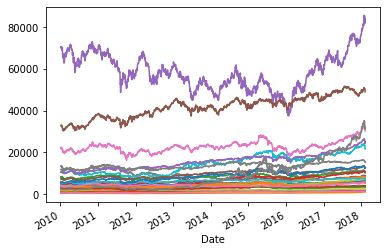

In [23]:
X_train.plot(legend = False)

<AxesSubplot:xlabel='Date'>

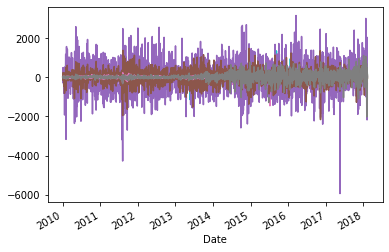

In [24]:
#Transformation
X_transform_data = X_train.diff().dropna()
X_transform_data.head()
X_transform_data.describe()
X_transform_data.plot(legend = False)

In [25]:
for i in X_transform_data:
    print(X_transform_data[i])
    augmented_dickey_fuller_statistics(X_transform_data[i])

Date
2010-01-05    -0.17
2010-01-06     3.62
2010-01-07    -1.10
2010-01-08     4.33
2010-01-11     7.99
              ...  
2018-02-03     0.00
2018-02-04     0.00
2018-02-05   -17.03
2018-02-06   -21.89
2018-02-07    -2.99
Name: SET, Length: 2466, dtype: float64
ADF Statistic: -48.667511
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-05    15.48
2010-01-06     1.93
2010-01-07    -1.12
2010-01-08   -12.44
2010-01-11    -5.84
              ...  
2018-02-03     0.00
2018-02-04     0.00
2018-02-05   -56.33
2018-02-06   -37.11
2018-02-07    28.95
Name: VNI, Length: 2466, dtype: float64
ADF Statistic: -15.892471
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-05    25.729980
2010-01-06    10.209961
2010-01-07   -17.239990
2010-01-08     9.510010
2010-01-11    10.770020
                ...    
2018-02-03     0.000000
2018-02-04     0.000000
2018-02-05   -46.890137
2018-02-06   -76.550049
2018-02-07   -22.609863
Name:

ADF Statistic: -26.238078
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-05    -16.439941
2010-01-06      2.470215
2010-01-07    -14.970215
2010-01-08     18.250000
2010-01-11      2.890137
                 ...    
2018-02-03      0.000000
2018-02-04      0.000000
2018-02-05    -97.669922
2018-02-06   -294.830078
2018-02-07    197.769531
Name: DAX PERFORMANCE-INDEX, Length: 2466, dtype: float64
ADF Statistic: -49.606910
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-05     -1.060059
2010-01-06      4.760010
2010-01-07      7.130127
2010-01-08     20.339844
2010-01-11     -2.049805
                 ...    
2018-02-03      0.000000
2018-02-04      0.000000
2018-02-05    -79.149902
2018-02-06   -124.020020
2018-02-07     94.089844
Name: CAC 40, Length: 2466, dtype: float64
ADF Statistic: -26.570158
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-05    -5.439941
2010-01-06    -2

## Granger's Causality Test

In [26]:
#Granger's Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

grangers_causality_matrix(X_transform_data, variables = X_transform_data.columns)  

SET_x   VNI_x  STI Index_x  \
SET_y                              1.0000  0.0672       0.0430   
VNI_y                              0.0150  1.0000       0.0000   
STI Index_y                        0.0083  0.7242       1.0000   
FTSE Bursa Malaysia KLCI_y         0.0000  0.3190       0.0000   
Composite Index_y                  0.0034  0.0686       0.0557   
PSEi INDEX_y                       0.0000  0.1911       0.0000   
HANG SENG INDEX_y                  0.0005  0.0048       0.0000   
Shenzhen Component_y               0.3770  0.0845       0.0451   
KOSPI Composite Index_y            0.0000  0.0245       0.0000   
Nikkei 225_y                       0.0000  0.0024       0.0000   
ALL ORDINARIES_y                   0.0000  0.1972       0.0000   
S&P/NZX 50 INDEX GROSS ( GROSS _y  0.0001  0.0463       0.0000   
TSEC weighted index_y              0.0000  0.0364       0.0000   
NIFTY 50_y                         0.0438  0.0283       0.0718   
Dow Jones Industrial Average_y     0.7099  0.3629       0.0966   
NYSE COMPOSITE (DJ)_y              0.2718  0.4656       0.0222   
Russell 2000_y                     0.2754  0.2855       0.4902   
S&P/TSX Composite index_y          0.0298  0.4433       0.0038   
NASDAQ Composite_y                 0.8093  0.3432       0.1409   
FTSE 100_y                         0.0225  0.6346       0.0136   
DAX PERFORMANCE-INDEX_y            0.2974  0.4331       0.1603   
CAC 40_y                           0.0670  0.5370       0.0739   
ESTX 50 PR.EUR_y                   0.1522  0.4569       0.1586   
BEL 20_y                           0.0163  0.5246       0.0272   
IBOVESPA_y                         0.0434  0.2171       0.2019   
IPC MEXICO_y                       0.4749  0.1628       0.0798   
S&P/CLX IPSA_y                     0.5098  0.1061       0.0470   
MERVAL_y                           0.3500  0.3700       0.6097   

                                   FTSE Bursa Malaysia KLCI_x  \
SET_y                                                  0.2607   
VNI_y                                                  0.0058   
STI Index_y                                            0.0089   
FTSE Bursa Malaysia KLCI_y                             1.0000   
Composite Index_y                                      0.0845   
PSEi INDEX_y                                           0.0040   
HANG SENG INDEX_y                                      0.0089   
Shenzhen Component_y                                   0.0101   
KOSPI Composite Index_y                                0.0349   
Nikkei 225_y                                           0.0627   
ALL ORDINARIES_y                                       0.2493   
S&P/NZX 50 INDEX GROSS ( GROSS _y                      0.0308   
TSEC weighted index_y                                  0.1194   
NIFTY 50_y                                             0.0965   
Dow Jones Industrial Average_y                         0.1356   
NYSE COMPOSITE (DJ)_y                                  0.2359   
Russell 2000_y                                         0.2275   
S&P/TSX Composite index_y                              0.1030   
NASDAQ Composite_y                                     0.6317   
FTSE 100_y                                             0.0630   
DAX PERFORMANCE-INDEX_y                                0.3208   
CAC 40_y                                               0.2174   
ESTX 50 PR.EUR_y                                       0.1414   
BEL 20_y                                               0.0696   
IBOVESPA_y                                             0.3376   
IPC MEXICO_y                                           0.3071   
S&P/CLX IPSA_y                                         0.1023   
MERVAL_y                                               0.4966   

                                   Composite Index_x  PSEi INDEX_x  \
SET_y                                         0.0000        0.1740   
VNI_y                                         0.0032        0.0077   
STI Index_y              

## VAR MODEL (Run All Markets)

In [27]:
#VAR MODEL (Run All Markets)
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

#Lag Order Selection
model_world = VAR(endog = X_transform_data)
res_world = model_world.select_order(30)
print(res_world.summary())

#Model
mod_world = VAR(X_transform_data)
res_world = mod_world.fit(maxlags=30, ic='aic')
print(res_world.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        198.7      198.8*   2.034e+86       198.8
1       198.0*       200.0  1.007e+86*      198.7*
2        198.2       202.0   1.236e+86       199.6
3        198.4       204.1   1.526e+86       200.5
4        198.7       206.3   2.031e+86       201.5
5        199.0       208.4   2.637e+86       202.4
6        199.2       210.5   3.372e+86       203.3
7        199.4       212.5   3.964e+86       204.2
8        199.6       214.6   5.025e+86       205.1
9        199.9       216.8   6.746e+86       206.0
10       200.2       218.9   9.039e+86       207.0
11       200.5       221.1   1.239e+87       208.0
12       200.7       223.2   1.563e+87       208.9
13       200.9       225.3   1.962e+87       209.8
14       201.1       227.3   2.460e+87       210.7
15       201.4       229.4   3.132e+87       211.6
16       201.6       231.6   4.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     18:30:09
--------------------------------------------------------------------
No. of Equations:         28.0000    BIC:                    199.932
Nobs:                     2465.00    HQIC:                   198.713
Log likelihood:          -341180.    FPE:                9.95794e+85
AIC:                      198.018    Det(Omega_mle):     7.17700e+85
--------------------------------------------------------------------
Results for equation SET
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                      0.325084         0.216819            1.499           0.134
L1.SET                                    -0.026980         0.023609           -

## Durbin Watson 

In [28]:
#Durbin Watson
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(res_world.resid)

print('Durbin Watson Test')
for col,val in zip(X_transform_data.columns,out):
    print((col), ':', round(val,2))

Durbin Watson Test
SET : 2.06
VNI : 1.98
STI Index : 2.07
FTSE Bursa Malaysia KLCI : 2.04
Composite Index : 2.02
PSEi INDEX : 2.04
HANG SENG INDEX : 2.08
Shenzhen Component : 2.01
KOSPI Composite Index : 2.1
Nikkei 225 : 2.05
ALL ORDINARIES : 2.13
S&P/NZX 50 INDEX GROSS ( GROSS  : 2.0
TSEC weighted index : 2.07
NIFTY 50 : 2.04
Dow Jones Industrial Average : 2.0
NYSE COMPOSITE (DJ) : 2.0
Russell 2000 : 2.0
S&P/TSX Composite index : 2.01
NASDAQ Composite : 2.0
FTSE 100 : 2.05
DAX PERFORMANCE-INDEX : 2.02
CAC 40 : 2.02
ESTX 50 PR.EUR : 2.02
BEL 20 : 2.02
IBOVESPA : 2.0
IPC MEXICO : 2.0
S&P/CLX IPSA : 2.01
MERVAL : 1.99


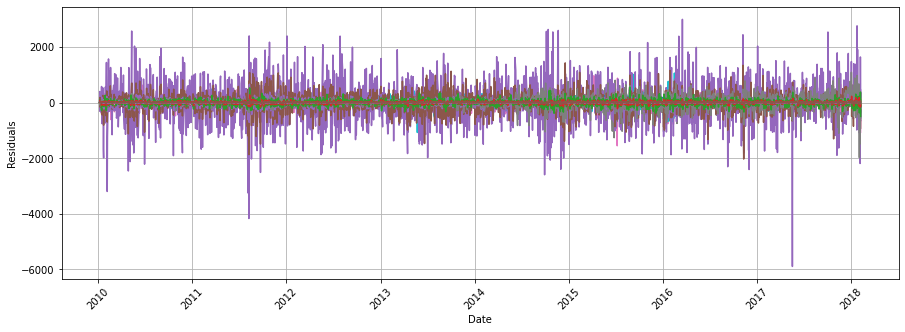

In [29]:
y_fitted = res_world.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_world.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [30]:
#ASEAN
X_transform_ASEAN = X_transform_data[['SET','VNI','STI Index','FTSE Bursa Malaysia KLCI','Composite Index','PSEi INDEX']]

#Lag Order Selection
model_ASEAN = VAR(endog = X_transform_ASEAN)
res_ASEAN = model_ASEAN.select_order(30)
print(res_ASEAN.summary())

mod_ASEAN = VAR(X_transform_ASEAN)
res_ASEAN = mod_ASEAN.fit(maxlags=30, ic='aic')
print(res_ASEAN.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        32.69      32.70*   1.568e+14       32.69
1        32.64       32.74   1.498e+14      32.68*
2        32.64       32.83   1.503e+14       32.71
3       32.63*       32.90  1.487e+14*       32.73
4        32.64       33.00   1.498e+14       32.77
5        32.65       33.09   1.513e+14       32.81
6        32.65       33.18   1.517e+14       32.85
7        32.66       33.28   1.535e+14       32.89
8        32.68       33.38   1.557e+14       32.93
9        32.69       33.48   1.580e+14       32.98
10       32.71       33.58   1.602e+14       33.02
11       32.72       33.68   1.624e+14       33.07
12       32.74       33.78   1.650e+14       33.12
13       32.74       33.87   1.663e+14       33.15
14       32.76       33.97   1.682e+14       33.20
15       32.76       34.06   1.697e+14       33.24
16       32.77       34.16   1.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     18:31:25
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    32.9084
Nobs:                     2463.00    HQIC:                   32.7372
Log likelihood:          -61050.6    FPE:                1.49674e+14
AIC:                      32.6395    Det(Omega_mle):     1.42930e+14
--------------------------------------------------------------------
Results for equation SET
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                               0.393622         0.224475            1.754           0.080
L1.SET                             -0.009374         0.023998           -0.391           0.696
L1.VNI

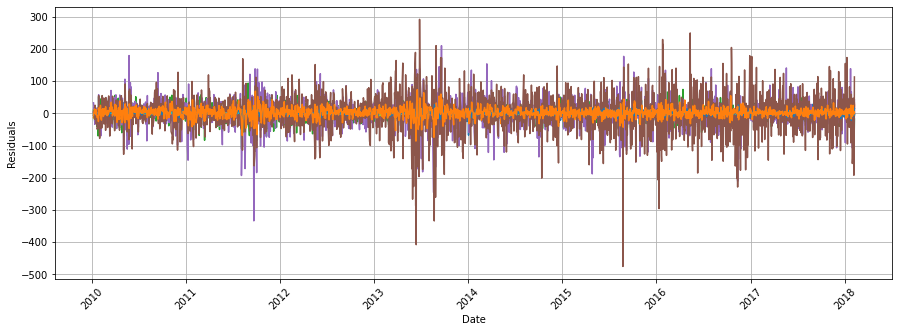

In [31]:
y_fitted = res_ASEAN.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_ASEAN.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [32]:
#ASIA
X_transform_ASIA = X_transform_data[['SET','HANG SENG INDEX','Shenzhen Component','KOSPI Composite Index'
                                     ,'Nikkei 225','TSEC weighted index','NIFTY 50','ALL ORDINARIES','S&P/NZX 50 INDEX GROSS ( GROSS ']]
#Lag Order Selection
model_ASIA = VAR(endog = X_transform_ASIA)
res_ASIA = model_ASIA.select_order(30)
print(res_ASIA.summary())

mod_ASIA = VAR(X_transform_ASIA)
res_ASIA = mod_ASIA.fit(maxlags=30, ic='aic')
print(res_ASIA.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        69.24      69.26*   1.176e+30      69.25*
1       69.18*       69.39  1.108e+30*       69.26
2        69.20       69.61   1.135e+30       69.35
3        69.24       69.84   1.180e+30       69.46
4        69.26       70.05   1.201e+30       69.55
5        69.29       70.28   1.240e+30       69.65
6        69.32       70.50   1.273e+30       69.75
7        69.33       70.70   1.282e+30       69.82
8        69.35       70.91   1.311e+30       69.92
9        69.39       71.14   1.362e+30       70.02
10       69.42       71.37   1.404e+30       70.13
11       69.45       71.59   1.451e+30       70.23
12       69.48       71.82   1.501e+30       70.33
13       69.51       72.04   1.538e+30       70.43
14       69.53       72.25   1.568e+30       70.52
15       69.56       72.47   1.624e+30       70.62
16       69.59       72.70   1.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     18:31:57
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    69.3972
Nobs:                     2465.00    HQIC:                   69.2621
Log likelihood:          -116660.    FPE:                1.11350e+30
AIC:                      69.1851    Det(Omega_mle):     1.07366e+30
--------------------------------------------------------------------
Results for equation SET
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                      0.405197         0.223560            1.812           0.070
L1.SET                                     0.007948         0.023164            

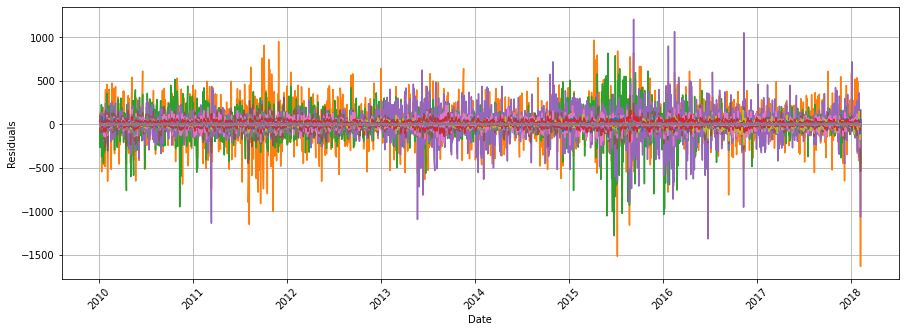

In [33]:
y_fitted = res_ASIA.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_ASIA.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [34]:
#Europe
X_transform_EU = X_transform_data[['SET','FTSE 100','DAX PERFORMANCE-INDEX','CAC 40','ESTX 50 PR.EUR','BEL 20']]
#Lag Order Selection
model_EU = VAR(endog = X_transform_EU)
res_EU = model_EU.select_order(30)
print(res_EU.summary())

mod_EU = VAR(X_transform_EU)
res_EU = mod_EU.fit(maxlags=30, ic='aic')
print(res_EU.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        35.32       35.34   2.187e+15       35.33
1       35.21*      35.31*  1.959e+15*      35.25*
2        35.22       35.41   1.979e+15       35.29
3        35.24       35.51   2.009e+15       35.33
4        35.25       35.60   2.031e+15       35.38
5        35.26       35.70   2.053e+15       35.42
6        35.26       35.79   2.062e+15       35.45
7        35.26       35.88   2.067e+15       35.49
8        35.28       35.98   2.098e+15       35.53
9        35.29       36.08   2.128e+15       35.58
10       35.31       36.18   2.162e+15       35.63
11       35.32       36.28   2.194e+15       35.67
12       35.34       36.38   2.227e+15       35.72
13       35.35       36.48   2.248e+15       35.76
14       35.36       36.57   2.272e+15       35.80
15       35.37       36.67   2.298e+15       35.84
16       35.38       36.77   2.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     18:32:27
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    35.3036
Nobs:                     2465.00    HQIC:                   35.2405
Log likelihood:          -64333.7    FPE:                1.94603e+15
AIC:                      35.2046    Det(Omega_mle):     1.91320e+15
--------------------------------------------------------------------
Results for equation SET
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.431743         0.222288            1.942           0.052
L1.SET                          -0.021762         0.021294           -1.022           0.307
L1.FTSE 100       

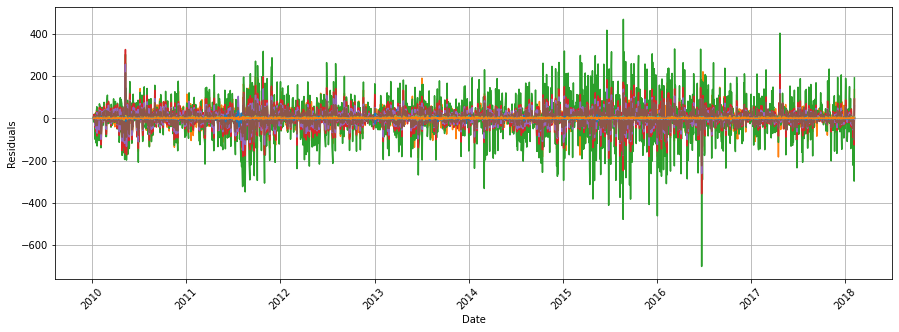

In [35]:
y_fitted = res_EU.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_EU.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [36]:
#North America
X_transform_NA = X_transform_data[['SET','Dow Jones Industrial Average','NYSE COMPOSITE (DJ)','Russell 2000'
                                   ,'S&P/TSX Composite index','NASDAQ Composite','IPC MEXICO']]
#Lag Order Selection
model_NA = VAR(endog = X_transform_NA)
res_NA = model_NA.select_order(30)
print(res_NA.summary())

mod_NA = VAR(X_transform_NA)
res_NA = mod_NA.fit(maxlags=30, ic='aic')
print(res_NA.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        48.33      48.35*   9.779e+20       48.34
1       48.25*       48.38  9.010e+20*      48.30*
2        48.26       48.51   9.141e+20       48.36
3        48.27       48.64   9.229e+20       48.41
4        48.30       48.78   9.443e+20       48.47
5        48.32       48.92   9.641e+20       48.54
6        48.34       49.06   9.874e+20       48.60
7        48.35       49.19   9.988e+20       48.66
8        48.37       49.31   1.011e+21       48.71
9        48.38       49.45   1.027e+21       48.77
10       48.40       49.58   1.046e+21       48.83
11       48.42       49.72   1.068e+21       48.89
12       48.44       49.85   1.086e+21       48.95
13       48.45       49.98   1.101e+21       49.01
14       48.47       50.12   1.127e+21       49.07
15       48.49       50.26   1.148e+21       49.13
16       48.52       50.40   1.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     18:33:03
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    48.3661
Nobs:                     2465.00    HQIC:                   48.2821
Log likelihood:          -83876.3    FPE:                8.86753e+20
AIC:                      48.2341    Det(Omega_mle):     8.66866e+20
--------------------------------------------------------------------
Results for equation SET
                                     coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------
const                                   0.396345         0.218113            1.817           0.069
L1.SET                                 -0.044364         0.020468           -2.167       

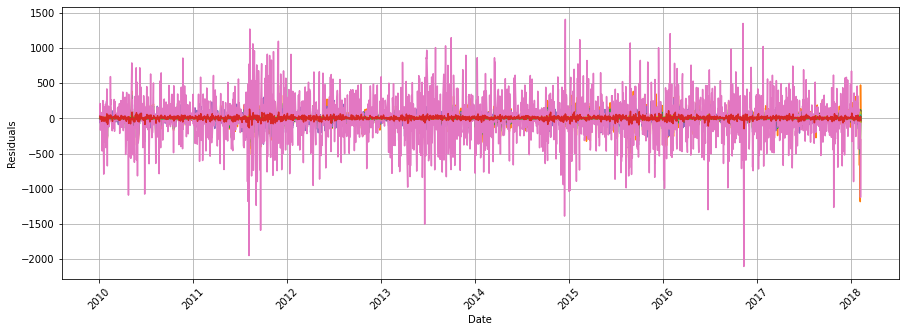

In [37]:
y_fitted = res_NA.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_NA.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [38]:
#South America
X_transform_SA = X_transform_data[['SET','IBOVESPA','S&P/CLX IPSA','MERVAL']]
#Lag Order Selection
model_SA = VAR(endog = X_transform_SA)
res_SA = model_SA.select_order(30)
print(res_SA.summary())

mod_SA = VAR(X_transform_SA)
res_SA = mod_SA.fit(maxlags=30, ic='aic')
print(res_SA.summary())


C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        34.99       35.00   1.564e+15       34.99
1        34.92      34.97*   1.464e+15      34.94*
2        34.92       35.00   1.461e+15       34.95
3       34.91*       35.03  1.446e+15*       34.95
4        34.92       35.08   1.457e+15       34.97
5        34.92       35.12   1.461e+15       34.99
6        34.92       35.16   1.467e+15       35.01
7        34.92       35.20   1.469e+15       35.02
8        34.93       35.24   1.473e+15       35.04
9        34.93       35.28   1.477e+15       35.06
10       34.93       35.32   1.482e+15       35.07
11       34.94       35.37   1.492e+15       35.09
12       34.95       35.42   1.508e+15       35.12
13       34.95       35.46   1.510e+15       35.13
14       34.96       35.50   1.519e+15       35.15
15       34.96       35.54   1.528e+15       35.17
16       34.97       35.59   1.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     18:33:16
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    35.0186
Nobs:                     2463.00    HQIC:                   34.9405
Log likelihood:          -56901.7    FPE:                1.42925e+15
AIC:                      34.8959    Det(Omega_mle):     1.39947e+15
--------------------------------------------------------------------
Results for equation SET
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.358024         0.219477            1.631           0.103
L1.SET                 -0.053586         0.020848           -2.570           0.010
L1.IBOVESPA             0.002269         0.000353     

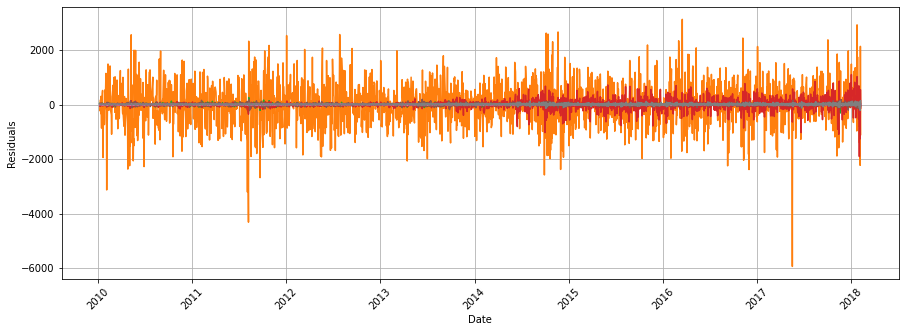

In [39]:
y_fitted = res_SA.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_SA.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [40]:
#Try only t-test <-2 and >2
X_transform_select = X_transform_data[['SET','STI Index','Composite Index','Shenzhen Component','Nikkei 225','NYSE COMPOSITE (DJ)','IBOVESPA','S&P/CLX IPSA']]
X_transform_select

#Lag Order Selection
model_select = VAR(endog = X_transform_select)
res_select = model_select.select_order(30)
res_select.summary()

#Model
mod_select = VAR(X_transform_select)
res_select = mod_select.fit(maxlags=30, ic='aic')
print(res_select.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     18:33:49
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    65.9228
Nobs:                     2464.00    HQIC:                   65.7187
Log likelihood:          -108656.    FPE:                3.09496e+28
AIC:                      65.6022    Det(Omega_mle):     2.92932e+28
--------------------------------------------------------------------
Results for equation SET
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.321214         0.214232            1.499           0.134
L1.SET                        -0.042167         0.022882           -1.843           0.065
L1.STI Index              

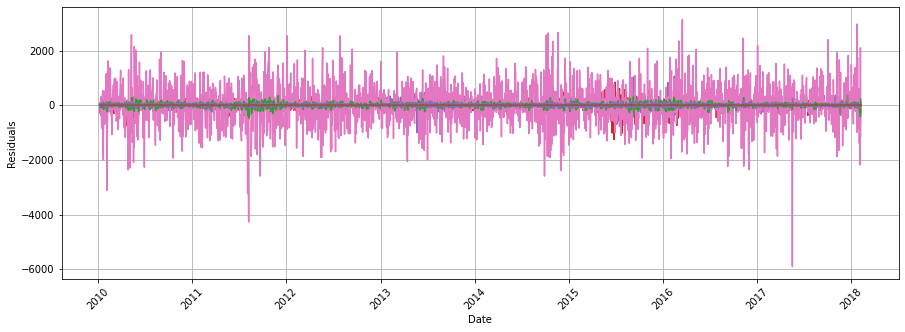

In [41]:
y_fitted = res_select.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_select.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [42]:
#Commodity
df_commodity = df.loc[:,['SET','Gold Jun 21','Crude Oil May 21','Bitcoin USD']]
#Split Training Data(70%)/Validation Data(30%)
n_obs = 2467 #For traning data 
X_train_com = df_commodity[0:n_obs]
X_validation_com = df_commodity[n_obs:]
print(X_train_com.shape,X_validation_com.shape)
      
#Transformation
X_transform_com_data = X_train_com.diff().dropna()
X_transform_com_data.head()
X_transform_com_data.describe()
X_transform_com_data.plot()

print(grangers_causality_matrix(X_transform_com_data, variables = X_transform_com_data.columns))

#Lag Order Selection
model_com = VAR(endog = X_transform_com_data)
res_com = model_com.select_order(30)
print(res_com.summary())

mod_com = VAR(X_transform_com_data)
res_com = mod_com.fit(maxlags=30, ic='aic')
print(res_com.summary())

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Crude Oil May 21'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [43]:
#Prediction
# Get the lag order
lag_order = res_world.k_ar
print(lag_order)

# Input data for forecasting
input_data = X_transform_data.values[-lag_order:]
print(input_data)

# Split Training Data(70%)/Validation Data(30%)
# n_obs = 2467 #For traning data 
# X_train = df_stock[0:n_obs]
# X_validation = df_stock[n_obs:]
# print(X_train.shape,X_validation.shape)

# forecasting
pred = res_world.forecast(y=input_data, steps=1058)
pred = (pd.DataFrame(pred ,index = X_validation.index,columns=X_validation.columns + '_pred'))
pred

1
[[-2.99000000e+00  2.89500000e+01 -2.26098633e+01  2.42301025e+01
   5.63261719e+01  1.17109375e+02 -2.72220703e+02 -1.30639648e+02
  -5.67500000e+01  3.51289062e+01  5.12998047e+01 -4.70996094e+01
   1.47540039e+02 -2.15498047e+01 -1.94199219e+01 -5.82705078e+01
   7.99926758e-01 -3.33007812e+01 -6.38999023e+01  1.38000000e+02
   1.97769531e+02  9.40898438e+01  5.96000977e+01  9.53098145e+01
  -1.12700000e+03 -3.28492188e+02  5.33300781e+01  2.55078125e+00]]


SET_pred  VNI_pred  STI Index_pred  FTSE Bursa Malaysia KLCI_pred  \
Date                                                                            
2018-02-08 -4.002932  0.201392      -13.810540                      -3.174284   
2018-02-09  1.063423  0.293161        1.174065                       0.110811   
2018-02-10 -0.023452  0.050498       -0.527193                       0.077956   
2018-02-11  0.503792  0.227911        0.260078                       0.216818   
2018-02-12  0.394893  0.195984        0.147990                       0.217498   
...              ...       ...             ...                            ...   
2020-12-27  0.424630  0.205660        0.181597                       0.221005   
2020-12-28  0.424630  0.205660        0.181597                       0.221005   
2020-12-29  0.424630  0.205660        0.181597                       0.221005   
2020-12-30  0.424630  0.205660        0.181597                       0.221005   
2020-12-31  0.424630  0.205660        0.181597                       0.221005   

            Composite Index_pred  PSEi INDEX_pred  HANG SENG INDEX_pred  \
Date                                                                      
2018-02-08            -37.071157       -26.991800            -41.481112   
2018-02-09              4.846914        -4.198004             11.989706   
2018-02-10             -0.186441         1.840235             -3.479503   
2018-02-11              1.951638         1.956095              3.650934   
2018-02-12              1.461201         2.326365              3.008578   
...                          ...              ...                   ...   
2020-12-27              1.580764         2.269722              3.229183   
2020-12-28              1.580764         2.269722              3.229183   
2020-12-29              1.580764         2.269722              3.229183   
2020-12-30              1.580764         2.269722              3.229183   
2020-12-31              1.580764         2.269722              3.229183   

            Shenzhen Component_pred  KOSPI Composite Index_pred  \
Date                                                              
2018-02-08                24.729155                    6.746785   
2018-02-09                14.544453                   -1.859715   
2018-02-10                -3.587955                    0.476187   
2018-02-11                -1.048015                    0.130143   
2018-02-12                -1.421387                    0.327153   
...                             ...                         ...   
2020-12-27                -1.323809                    0.286318   
2020-12-28                -1.323809                    0.286318   
2020-12-29                -1.323809                    0.286318   
2020-12-30                -1.323809                    0.286318   
2020-12-31                -1.323809                    0.286318   

            Nikkei 225_pred  ALL ORDINARIES_pred  \
Date                                               
2018-02-08        60.097357             2.558358   
2018-02-09        -8.919021            -2.373201   
2018-02-10         5.893382             0.960279   
2018-02-11         3.372113             0.030176   
2018-02-12         4.843538             0.559791   
...                     ...                  ...   
2020-12-27         4.456116             0.422972   
2020-12-28         4.456116             0.422972   
2020-12-29         4.456116             0.422972   
2020-12-30         4.456116             0.422972   
2020-12-31         4.456116             0.422972   

            S&P/NZX 50 INDEX GROSS ( GROSS _pred  TSEC weighted index_pred  \
Date                                                                         
2018-02-08                             -3.468390                -51.790193   
2018-02-09                              0.918657                 -1.712454   
2018-02-10                              1.651051                  0.344577   
2018-02-11                              1.9

In [44]:
# inverting transformation
def invert_transformation(X_train, pred):
    forecast = pred.copy()
    columns = X_train.columns
    for col in columns:
        forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast

output = invert_transformation(X_validation, pred)

# combining predicted and real data set
combine = pd.concat([output['SET_pred'], X_validation['SET']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.SET_pred /row.SET *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=2)
combine = combine.reset_index()
combine = combine.sort_values(by='Date', ascending=True)
combine

Date  SET_pred      SET accuracy
0    2018-02-08   1445.35  1786.66   80.90%
1    2018-02-09   1446.41  1786.45   80.97%
2    2018-02-10   1446.39  1786.45   80.96%
3    2018-02-11   1446.89  1786.45   80.99%
4    2018-02-12   1447.29  1799.45   80.43%
...         ...       ...      ...      ...
1053 2020-12-27   1892.73  1486.31  127.34%
1054 2020-12-28   1893.15  1452.67  130.32%
1055 2020-12-29   1893.58  1461.95  129.52%
1056 2020-12-30   1894.00  1449.35  130.68%
1057 2020-12-31   1894.43  1449.35  130.71%

[1058 rows x 4 columns]

<AxesSubplot:xlabel='Date'>

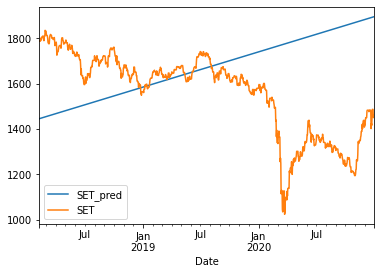

In [45]:
df = combine[['SET_pred','SET']]
df.index = combine['Date']
df.plot()

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
#Forecast bias
forecast_errors = [combine['SET'][i]- combine['SET_pred'][i] for i in range(len(combine['SET']))]
bias = sum(forecast_errors) * 1.0/len(combine['SET'])
print('Bias: %f' % bias)
print('Mean absolute error:', mean_absolute_error(combine['SET'].values, combine['SET_pred'].values))
print('Mean squared error:', mean_squared_error(combine['SET'].values, combine['SET_pred'].values))
print('Root mean squared error:', math.sqrt(mean_squared_error(combine['SET'].values, combine['SET_pred'].values)))


Bias: -110.831985
Mean absolute error: 243.58474480151227
Mean squared error: 100603.20918374292
Root mean squared error: 317.18008951342284


In [47]:
lag_order = res_ASEAN.k_ar
# forecast 8 periods foreward
res_ASEAN.forecast(X_transform_ASEAN.values[-lag_order:],8)

array([[-8.25905450e-01, -2.22381381e+00, -8.67043845e+00,
        -7.80983773e-01, -2.63648185e+00, -1.51251957e+01],
       [ 6.32287515e-01, -2.20746348e+00,  7.53731200e+00,
        -3.74517320e-02,  1.23516946e+01, -1.56731678e+01],
       [ 8.07328225e-01,  4.54349579e-01, -2.48001323e+00,
        -8.34641775e-01, -1.73694327e+01, -1.54826534e+00],
       [ 2.67776060e-01,  2.29891374e-01, -4.93729773e-02,
         3.63431765e-01,  2.32213117e+00,  3.45749144e+00],
       [-1.02050410e-02,  4.20359568e-02, -1.34817207e-01,
         2.38813580e-01,  2.28762972e+00,  3.71315077e+00],
       [ 4.55073159e-01,  1.64292281e-01,  5.01400834e-01,
         1.40059400e-01,  3.22057830e+00,  1.26422669e-01],
       [ 5.03182412e-01,  1.89013940e-01,  2.00070893e-01,
         2.50853218e-01,  1.51259369e+00,  2.57835441e+00],
       [ 4.54596947e-01,  2.14965944e-01,  1.68132680e-01,
         2.47850511e-01,  1.46003694e+00,  2.49968990e+00]])

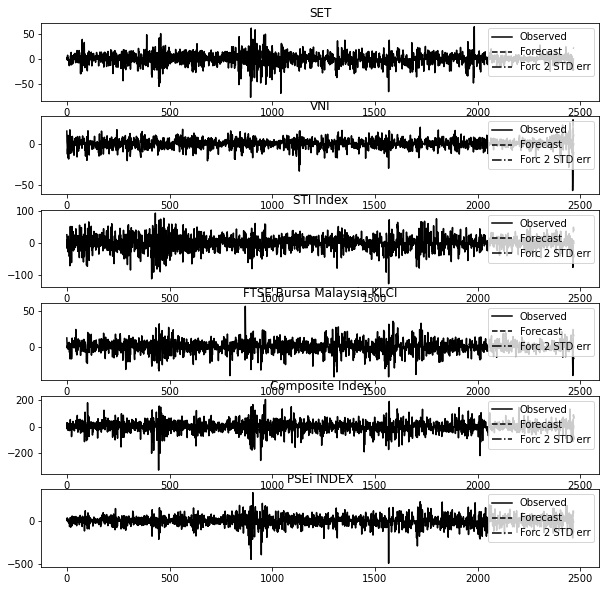

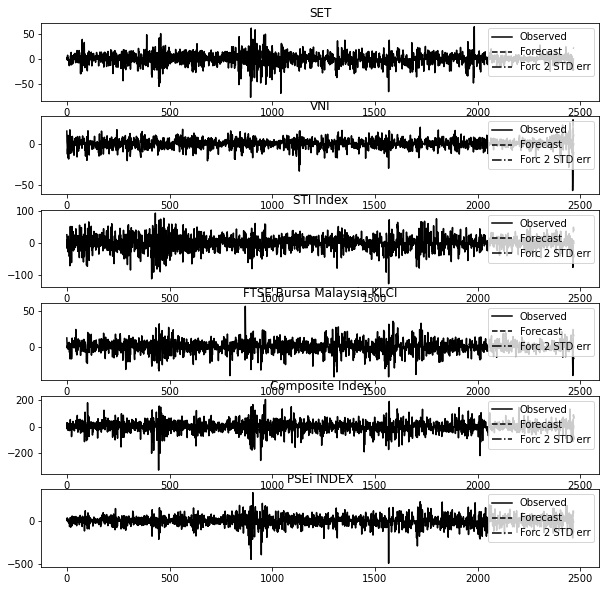

In [48]:
res_ASEAN.plot_forecast(5)

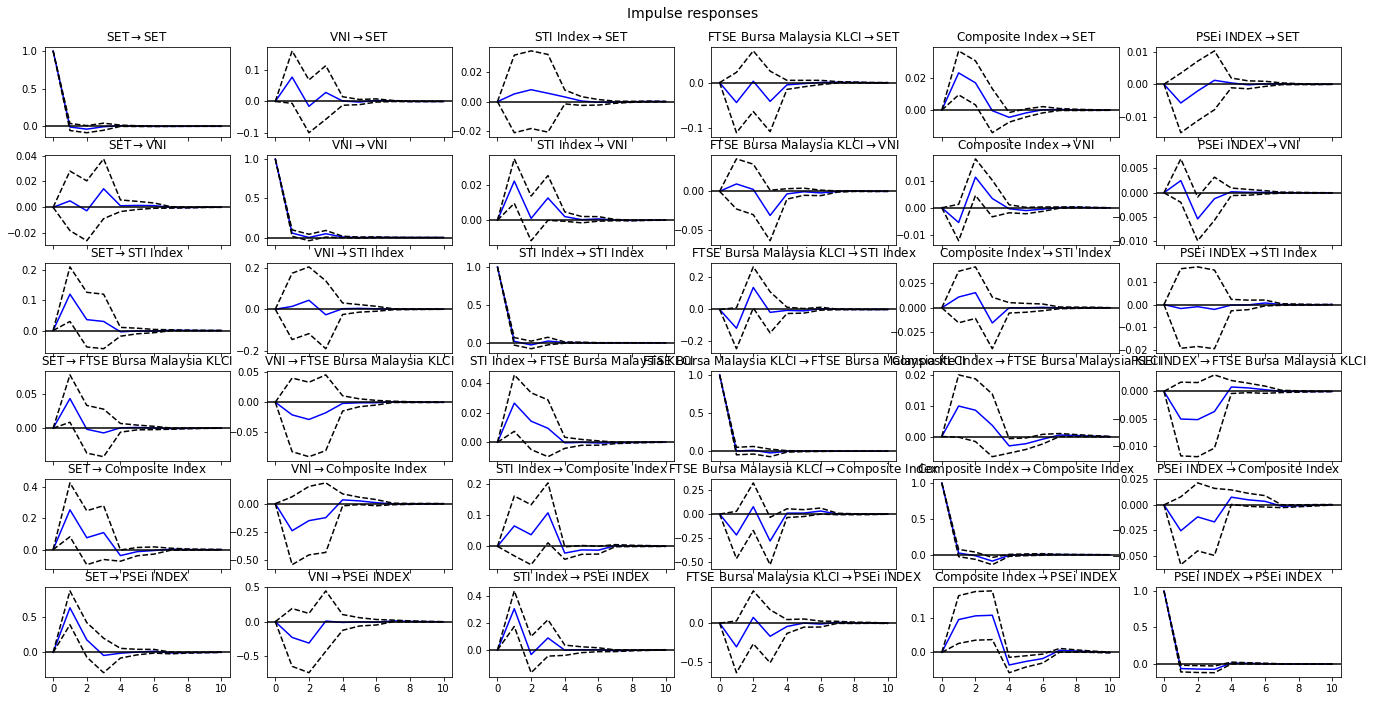

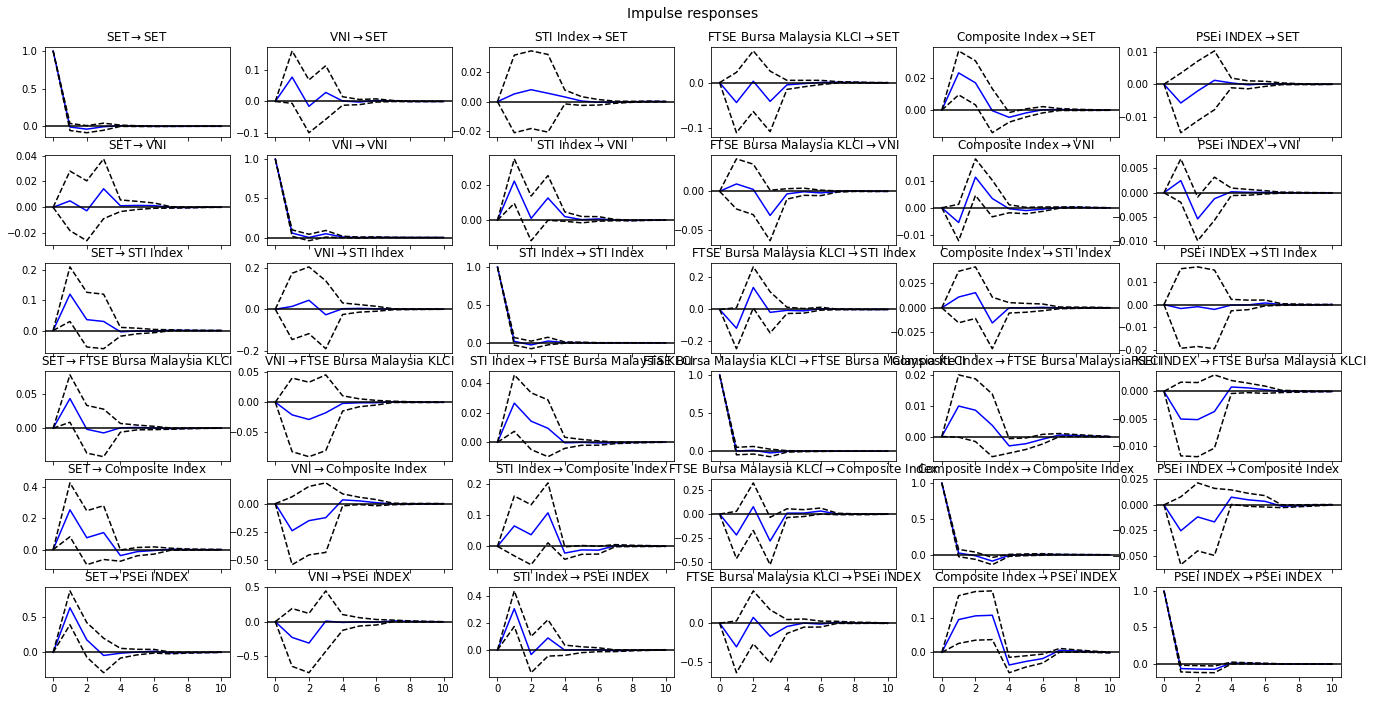

In [49]:
#Impulse Response Function
irf = res_ASEAN.irf(10)
irf.plot(orth=False,figsize = (20,10))

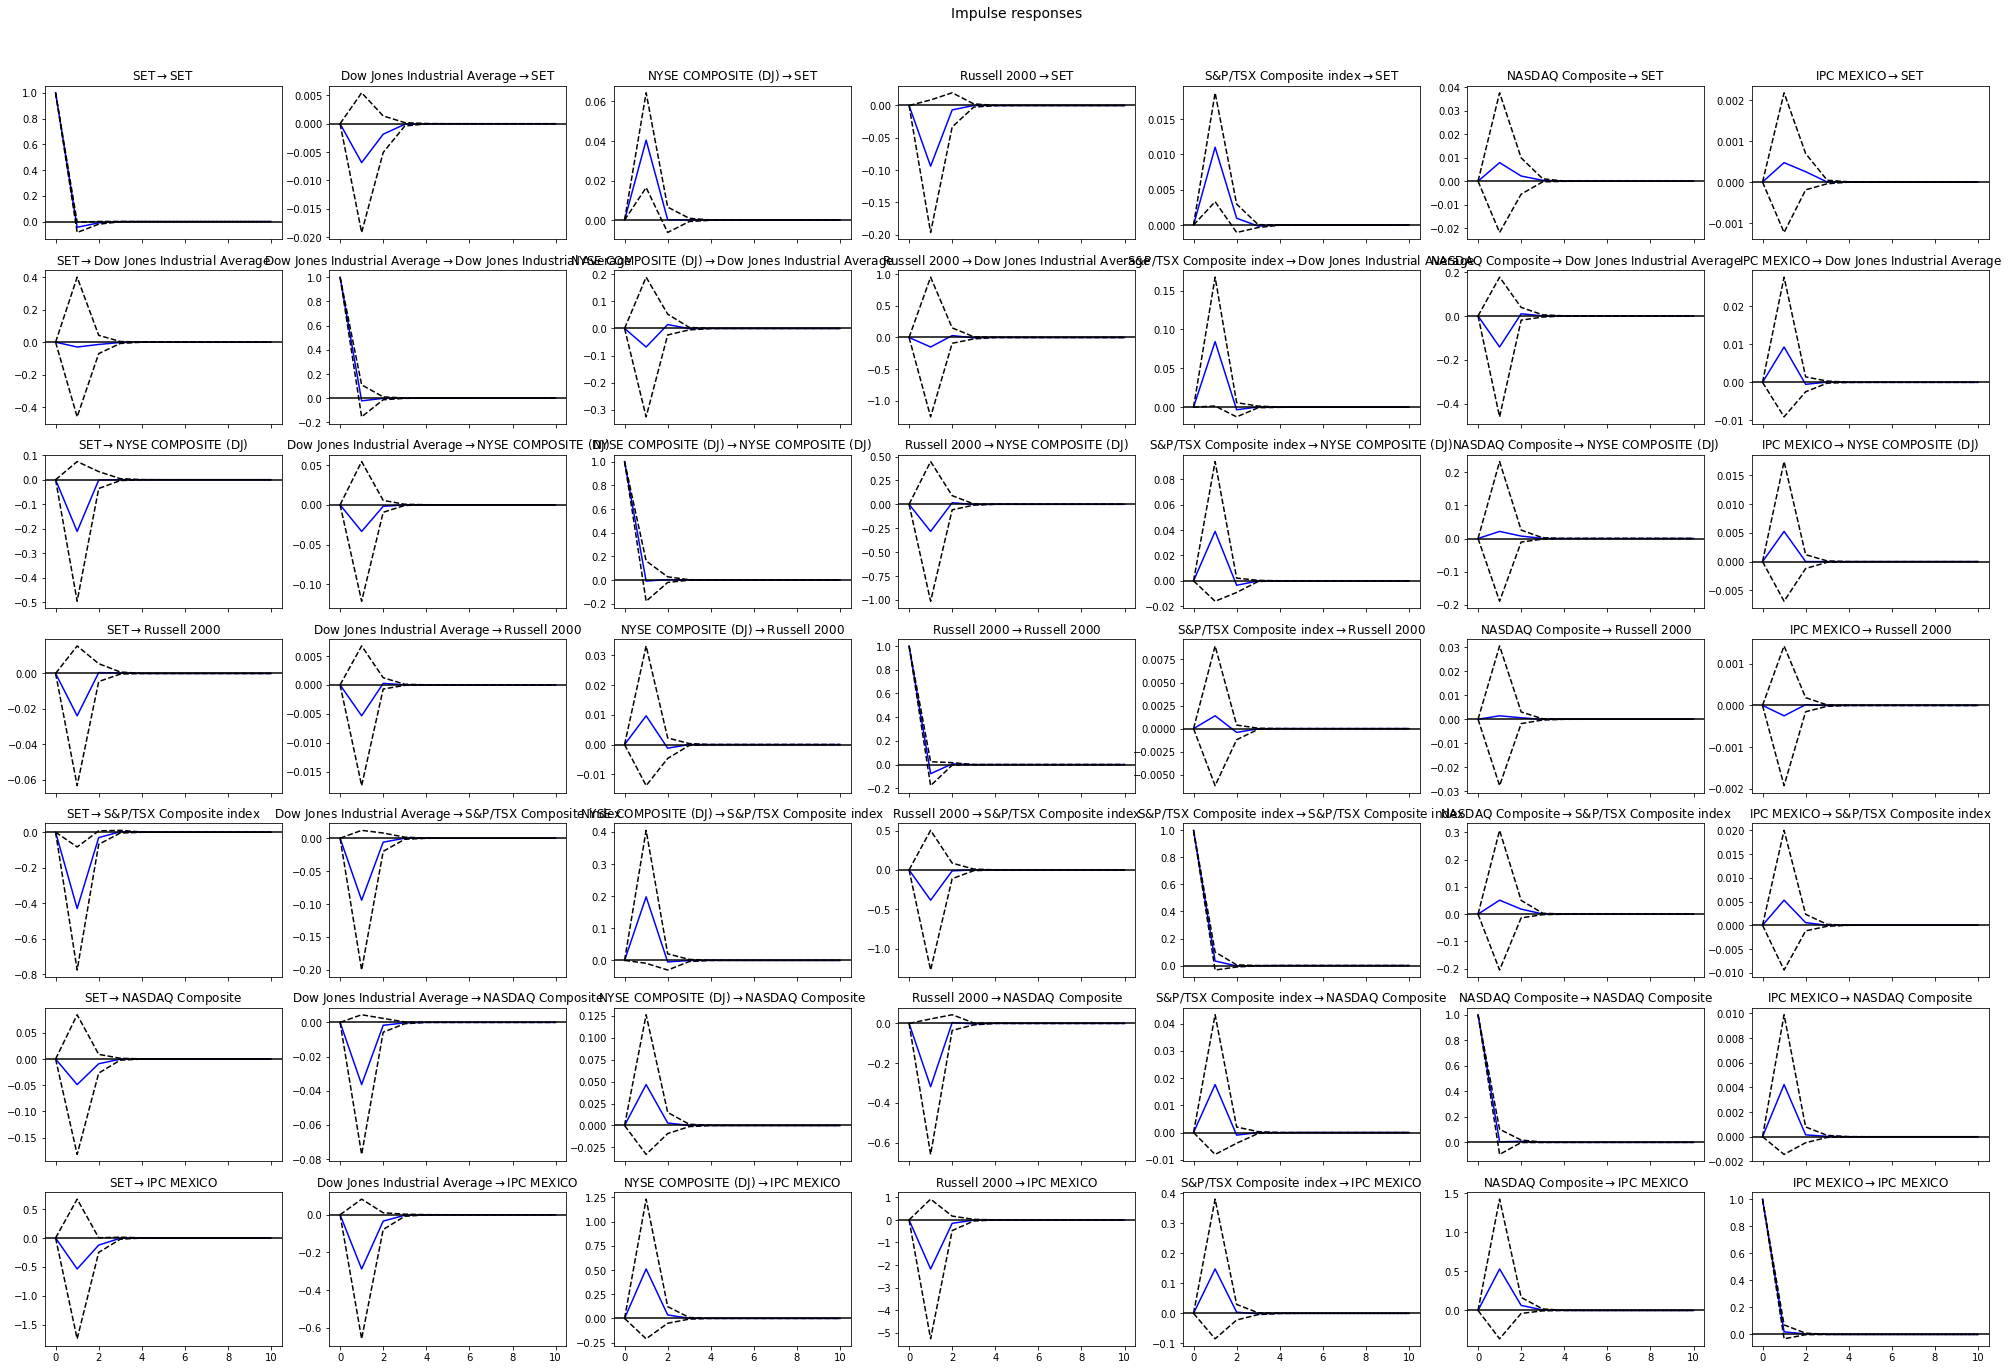

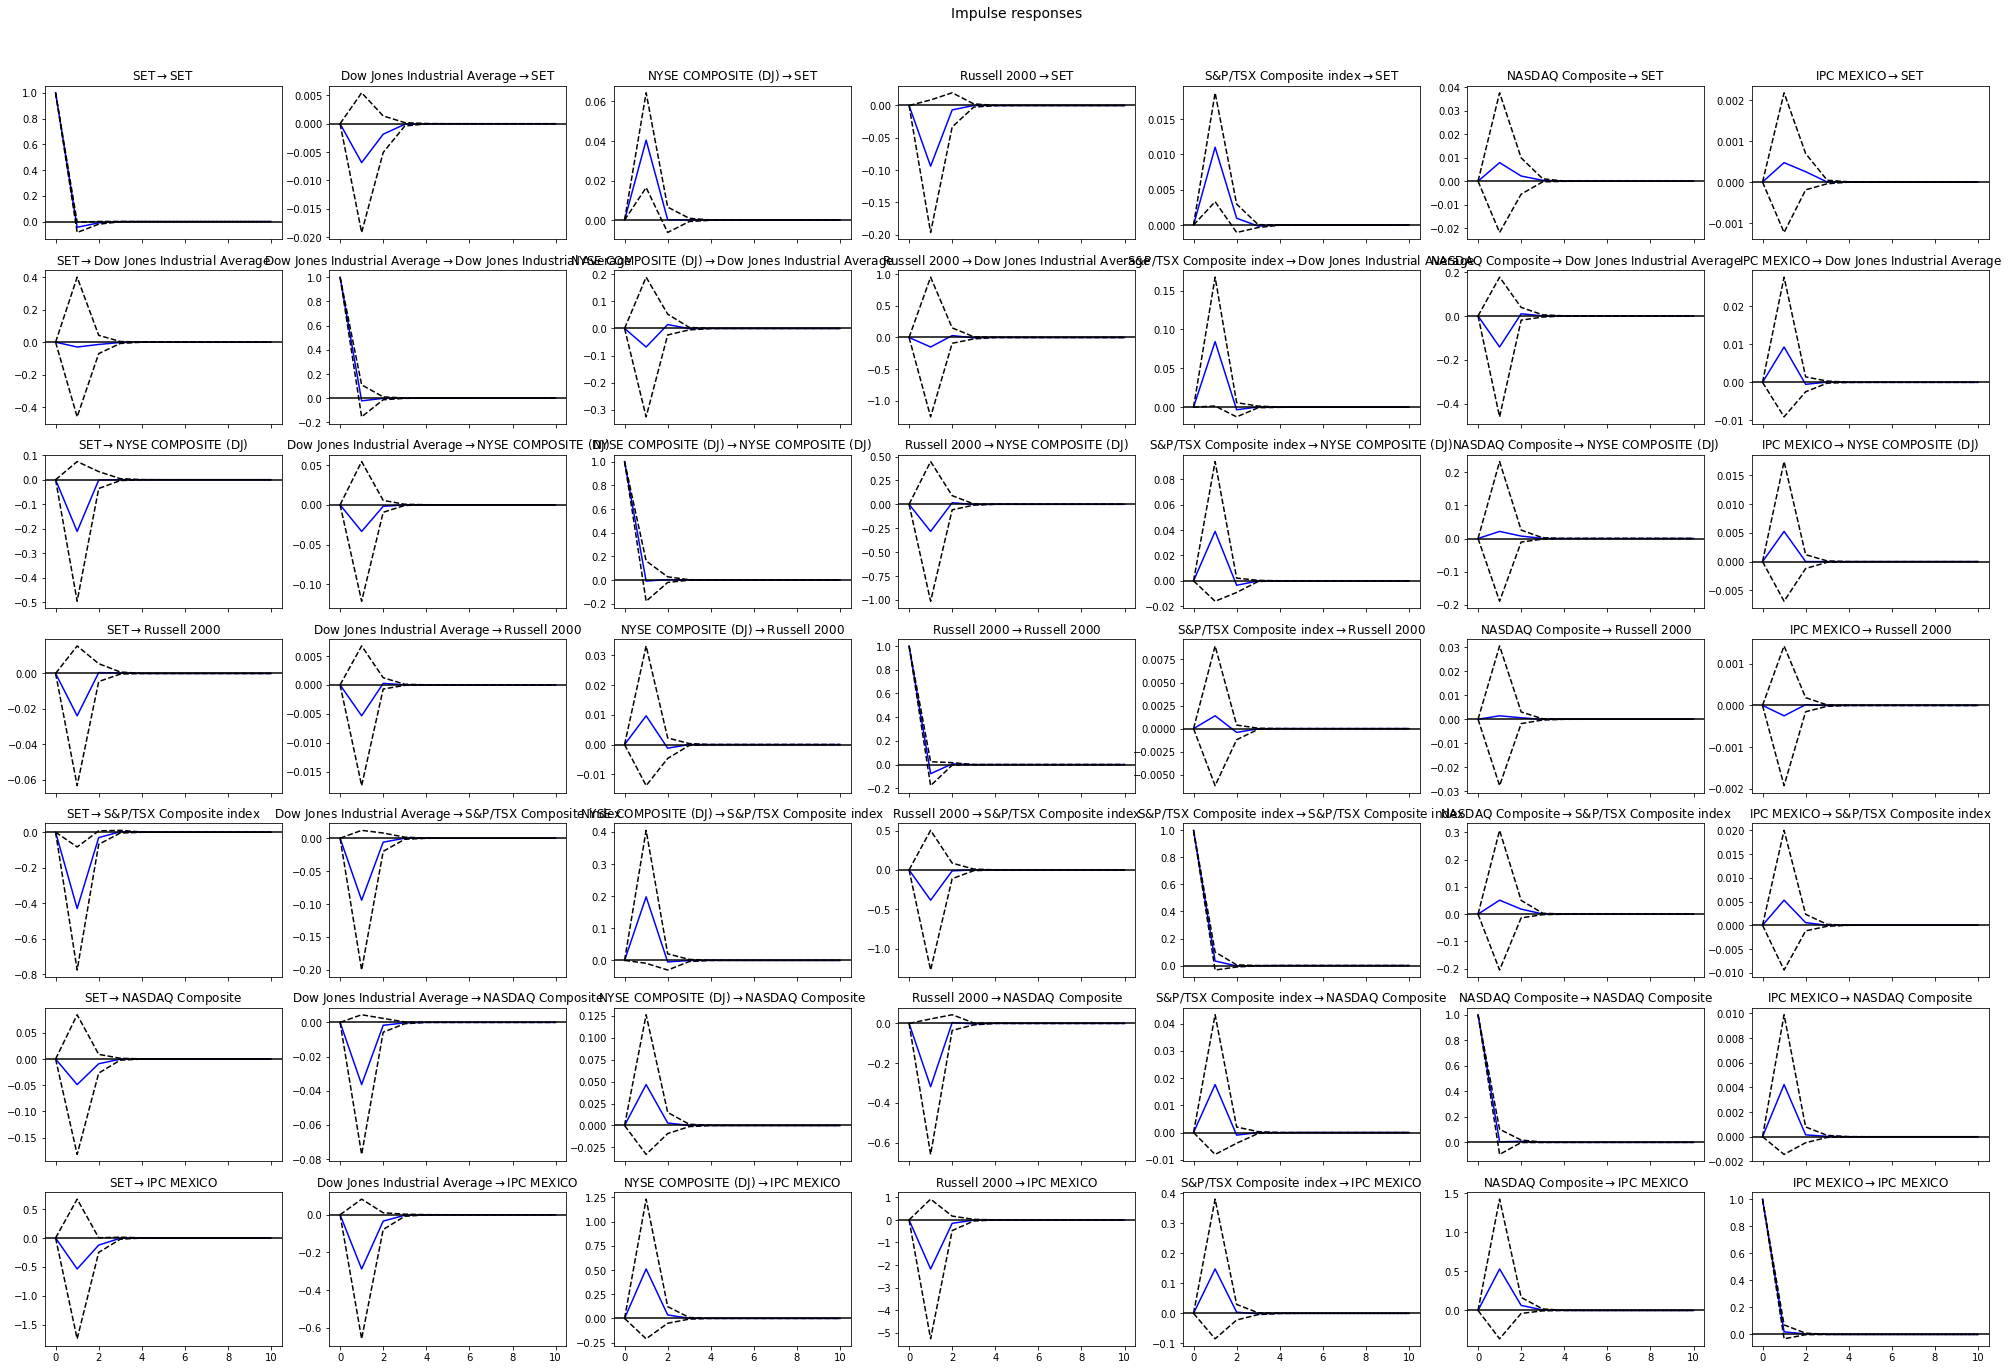

In [50]:
irf = res_NA.irf(10)
irf.plot(orth=False,figsize = (30,20))